In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy
import matplotlib.colors as mcolors
import networkx as nx
import pickle

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')
    os.chdir('..')
    os.chdir('..')
    os.chdir('..')

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_wc, cost_functions
from neurolib.optimal_control.oc_utils.plot_oc import plot_oc_nw

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

options = {
    'node_color': 'lightgray',
    'node_size': 1000,
    'width': 2,
    'arrowstyle': '-|>',
    'arrowsize': 20,
    'font_size' : 20,
    'font_weight' : 'bold',
    }

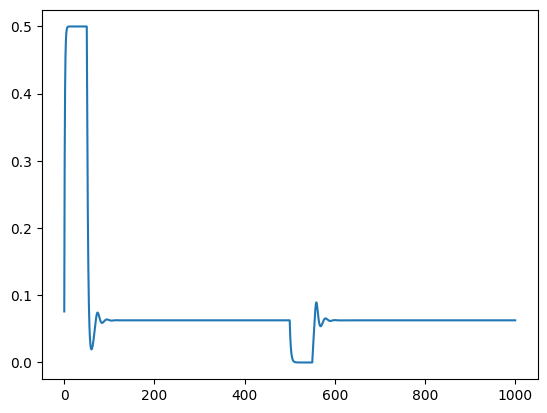

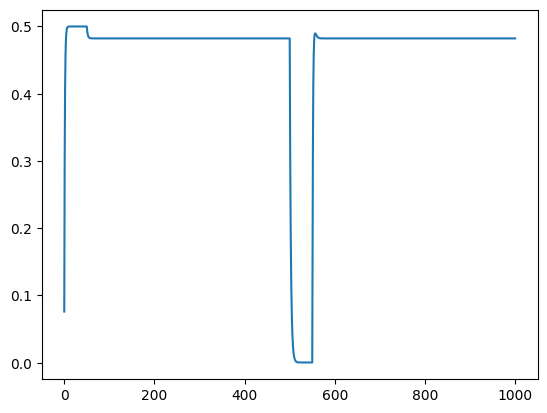

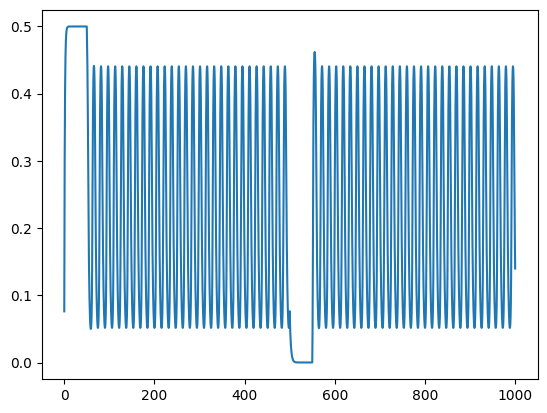

period =  15.67777777777778


In [2]:
comp_points = [[1., 0.5], [3., 0.5], [2., 0.5]]

N = 1

colors = []
n = 0
for col in mcolors.TABLEAU_COLORS:
    colors.append(col)
    n += 1
    if n >= N: break

model = WCModel()

dt = 0.1
model.params['dt'] = dt # Integration time step, ms
model.params['duration'] = 1. * 1000 # Simulation time, ms
model.params.signalV = 1.

zero_input = ZeroInput().generate_input(duration=model.params['duration']+model.params.dt, dt=model.params.dt)
rect_input = np.vstack( (zero_input)*2 )
rect_input[0,:500] = 5.
rect_input[0,5000:5500] = -5.

for p in comp_points:
    model.params["exc_ext"] = p[0] + rect_input[0,:]
    model.params["inh_ext"] = p[1]
    model.run()

    for n in range(N):
        plt.plot(model.t, model.exc[n,:], color=colors[n])
    plt.show()

    if p[0] == 2.:

        peaks = scipy.signal.find_peaks(model.exc[0,2000:5000])[0]
        plist = []
        for pind in range(1, len(peaks)):
            plist.append(model.params.dt * (peaks[pind]-peaks[pind-1]))

        period = np.mean(plist)
        print("period = ", period)


In [3]:
def getperiods(x, prominence):
    timing_list = [None] * N
    periods_list = [None] * N

    for n in range(N):
        timing_list[n] = scipy.signal.find_peaks(x[n, 0, 300:], prominence=prominence)[0]
        periods_list[n] = []
        if len(timing_list[n]) < 3:
            continue
        for pind in range(1, len(timing_list[n])):
            periods_list[n].append(model.params.dt * (timing_list[n][pind]-timing_list[n][pind-1]))

    return timing_list, periods_list

In [4]:
controlmat = np.zeros((N,2))
controlmat[:,0] = 1.

costmat = np.zeros((N, 2))
costmat[:,0] = 1.

duration = 200.
model.params.duration = duration
zero_input0 = ZeroInput().generate_input(duration=duration+model.params.dt, dt=model.params.dt)
zero_input = np.vstack( ([zero_input0]*2) )[np.newaxis,:,:]
zero_control = np.vstack( ([zero_input]*N))

print(zero_input0.shape, zero_input.shape, zero_control.shape)

w2_array = [1e-3, 1e-5]

results = dict()
results["controls"] = [ [ [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ],  ], 
                        [ [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ],  ], 
                        [ [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ],  ], 
]

target_array = [0.5*period, 0.9*period, period, 1.1*period, 1.6*period]
results["periods"] =  [ [ [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ],  ], 
                        [ [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ],  ], 
                        [ [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ],  ], 
]
results["timings"] =  [ [ [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ],  ], 
                        [ [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ],  ], 
                        [ [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ], [ [None, None], [None, None], [None, None], [None, None] ],  ], 
]

(1, 2001) (1, 2, 2001) (1, 2, 2001)


In [20]:
it = 400
pr = np.arange(0,101,10)
maxstr = 10.
nmaxdel = model.getMaxDelay()

proms = [0.01, 0.001]

init_control = zero_control.copy()
dir = "images_1n"

pind =  0
itar =  0
imet =  0
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.06710714818877642
Cost in iteration 10: -0.06712689386547559
Cost in iteration 20: -0.06714204850063893
Cost in iteration 30: -0.06715564965033284
Cost in iteration 40: -0.06716839593326479
Cost in iteration 50: -0.06717848550763209
Cost in iteration 60: -0.06718554027133397
Cost in iteration 70: -0.06719253126987138
Cost in iteration 80: -0.06719902125568093
Cost in iteration 90: -0.06720422812480878
Cost in iteration 100: -0.06720890636714394
Final cost : -0.06723768025150152


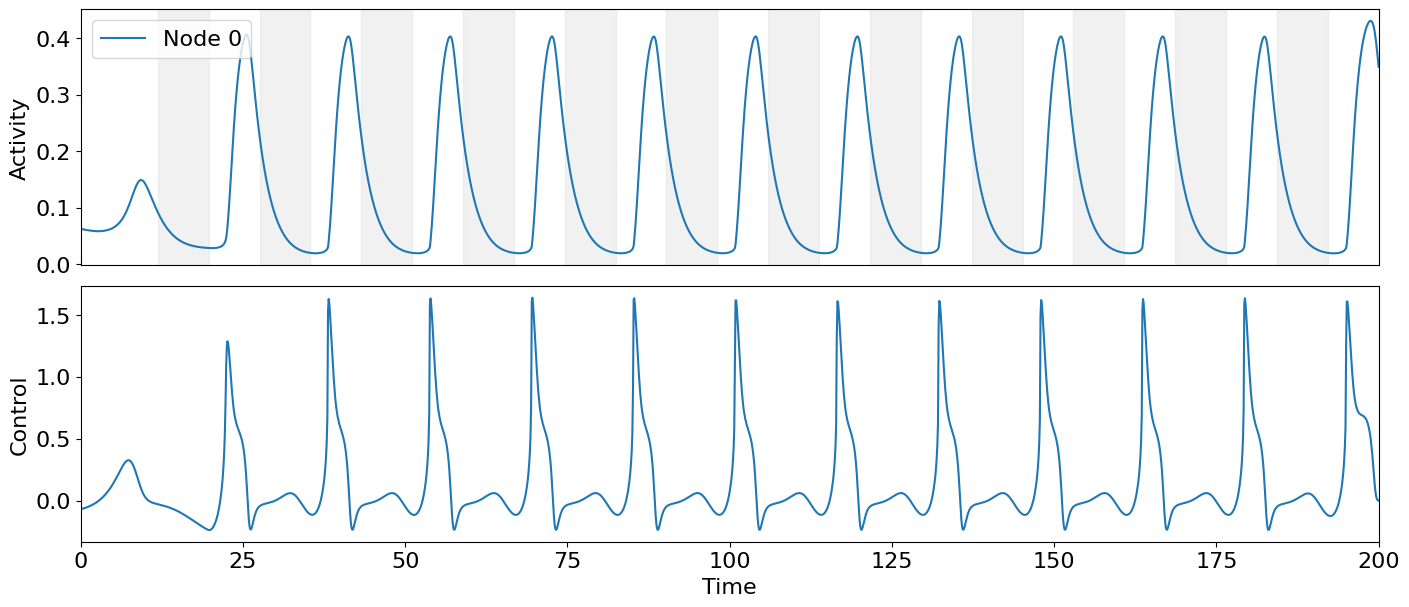

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.17553024439951434
Cost in iteration 10: -0.17554476370881475
Cost in iteration 20: -0.17558914408992057
Cost in iteration 30: -0.17563235162203075
Cost in iteration 40: -0.17567236119421106
Cost in iteration 50: -0.1757069387573526
Cost in iteration 60: -0.17575522748090444
Cost in iteration 70: -0.17580405262553941
Cost in iteration 80: -0.17584745360751486
Cost in iteration 90: -0.17589388780268456
Cost in iteration 100: -0.17595021316887627
Final cost : -0.17783400673055955


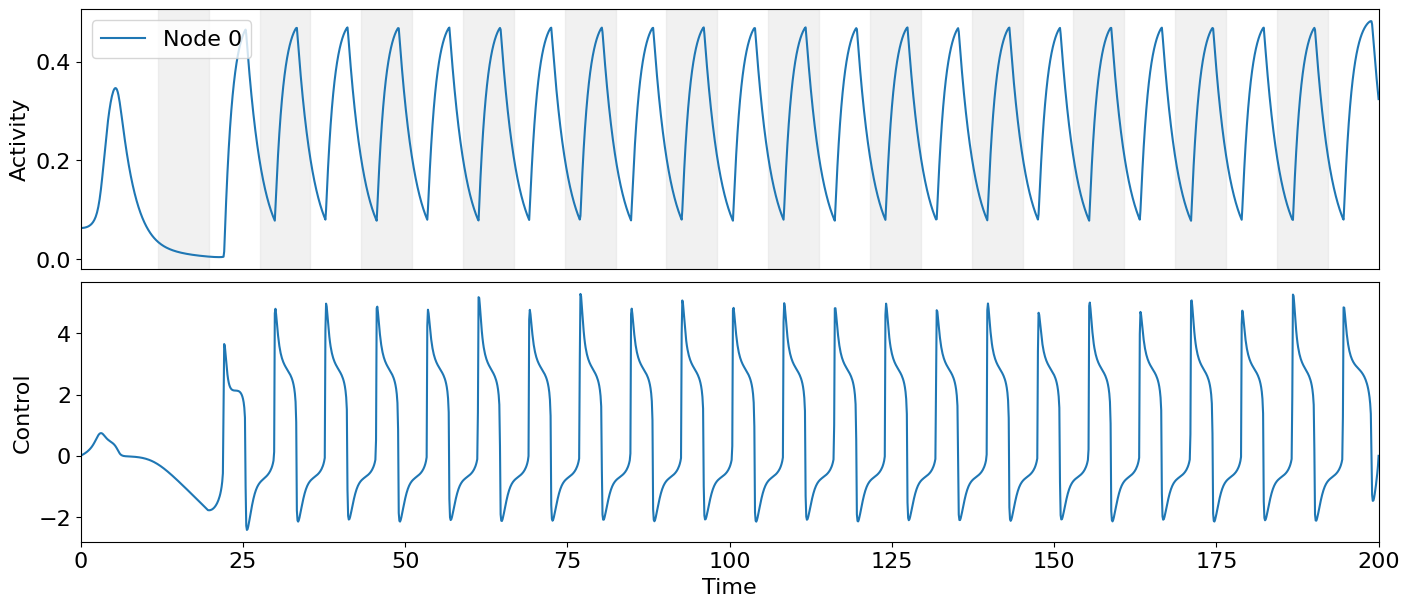

itar =  1
imet =  0
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.16878864842547467
Converged in iteration 2 with cost -0.16878864842547467
Final cost : -0.16878864842547467


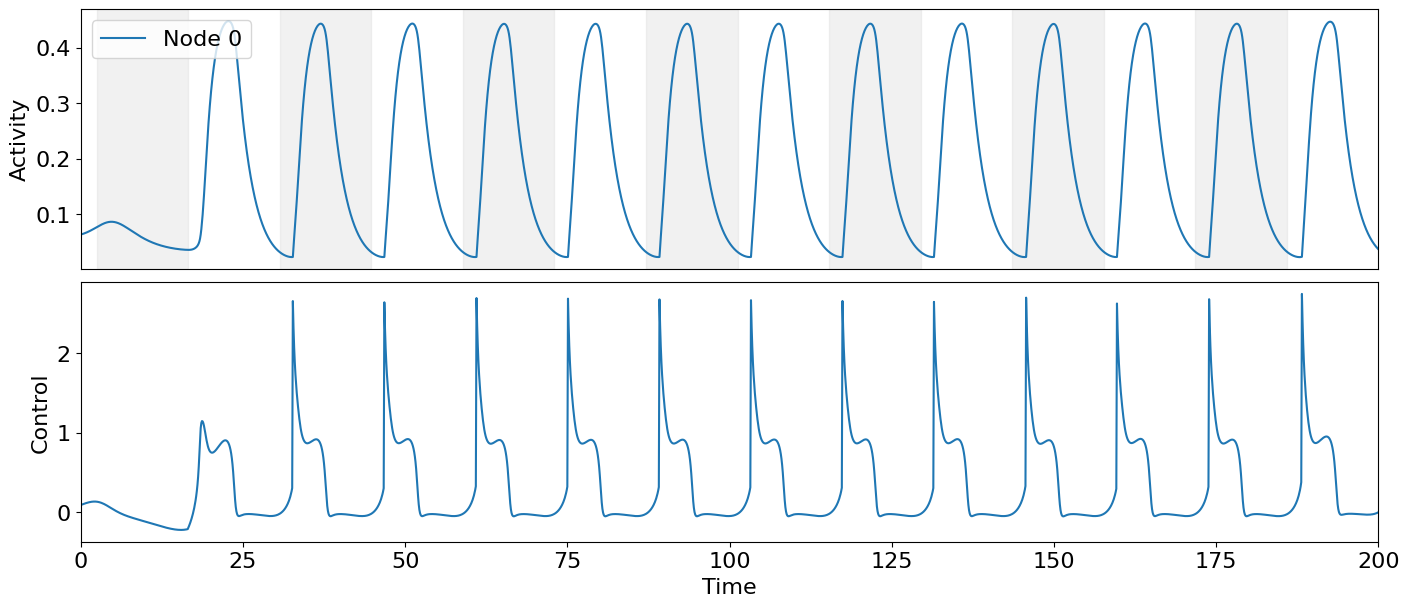

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.24151525964436793
Cost in iteration 10: -0.24151701392579325
Cost in iteration 20: -0.24152777695981878
Cost in iteration 30: -0.24153729893175563
Cost in iteration 40: -0.24154514180200312
Cost in iteration 50: -0.241553216092658
Cost in iteration 60: -0.2415609675709025
Cost in iteration 70: -0.2415718769548029
Cost in iteration 80: -0.24158254730451836
Cost in iteration 90: -0.2415912876050096
Cost in iteration 100: -0.24160093744535732
Final cost : -0.24227697720019012


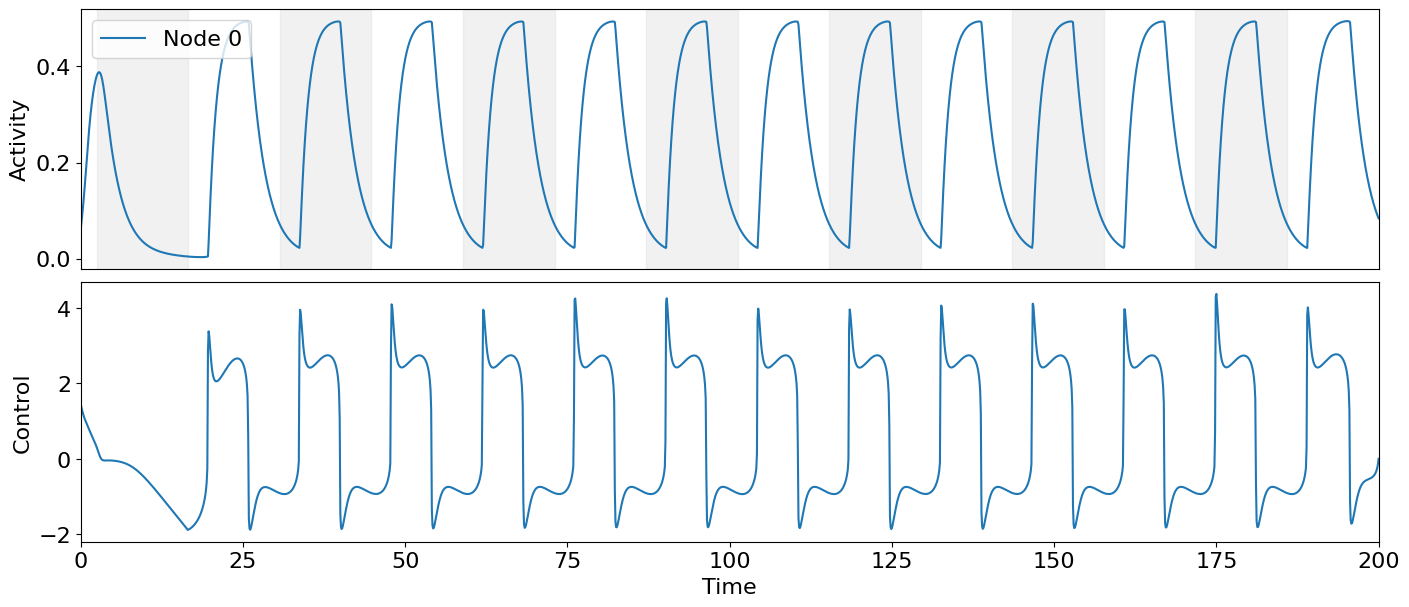

itar =  2
imet =  0
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.17955001532443524
Converged in iteration 2 with cost -0.17955001532443524
Final cost : -0.17955001532443524


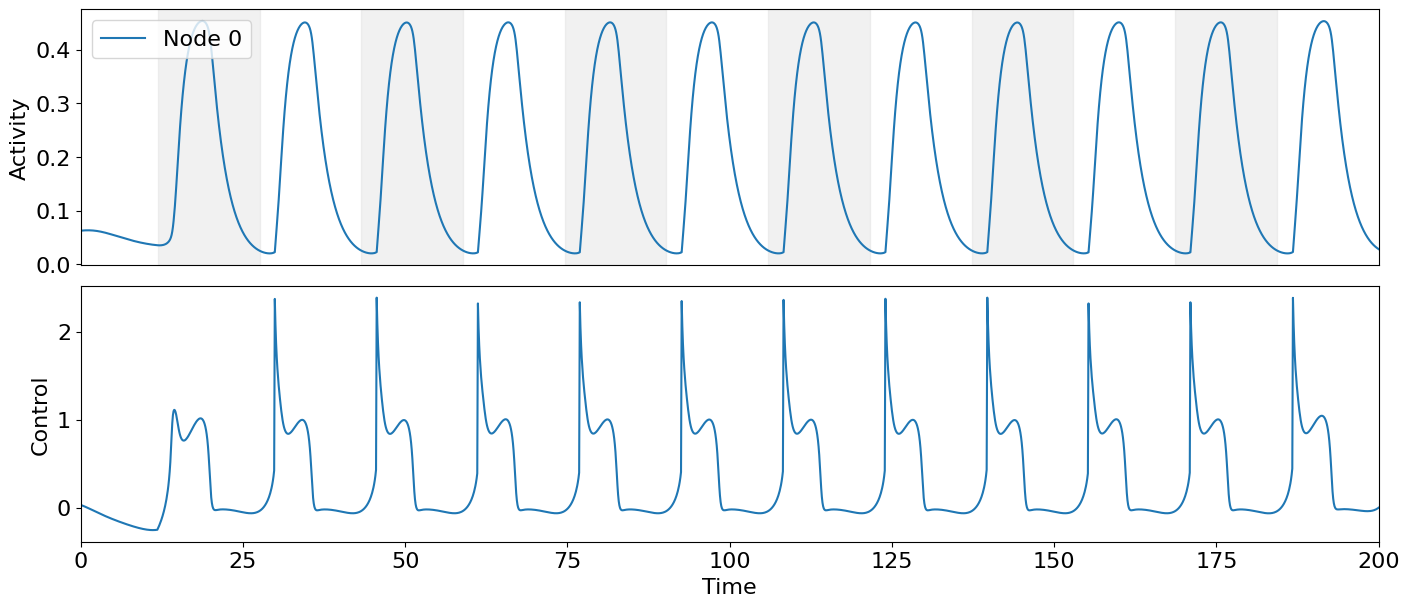

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.250879733209921
Cost in iteration 10: -0.2508806332109987
Cost in iteration 20: -0.2508881204725837
Cost in iteration 30: -0.25089493892117143
Cost in iteration 40: -0.25090264024854053
Cost in iteration 50: -0.25090799848531
Cost in iteration 60: -0.2509142165503041
Cost in iteration 70: -0.25092148060245434
Cost in iteration 80: -0.2509300273910289
Cost in iteration 90: -0.25093851395933725
Cost in iteration 100: -0.2509444745309542
Final cost : -0.2514524410048782


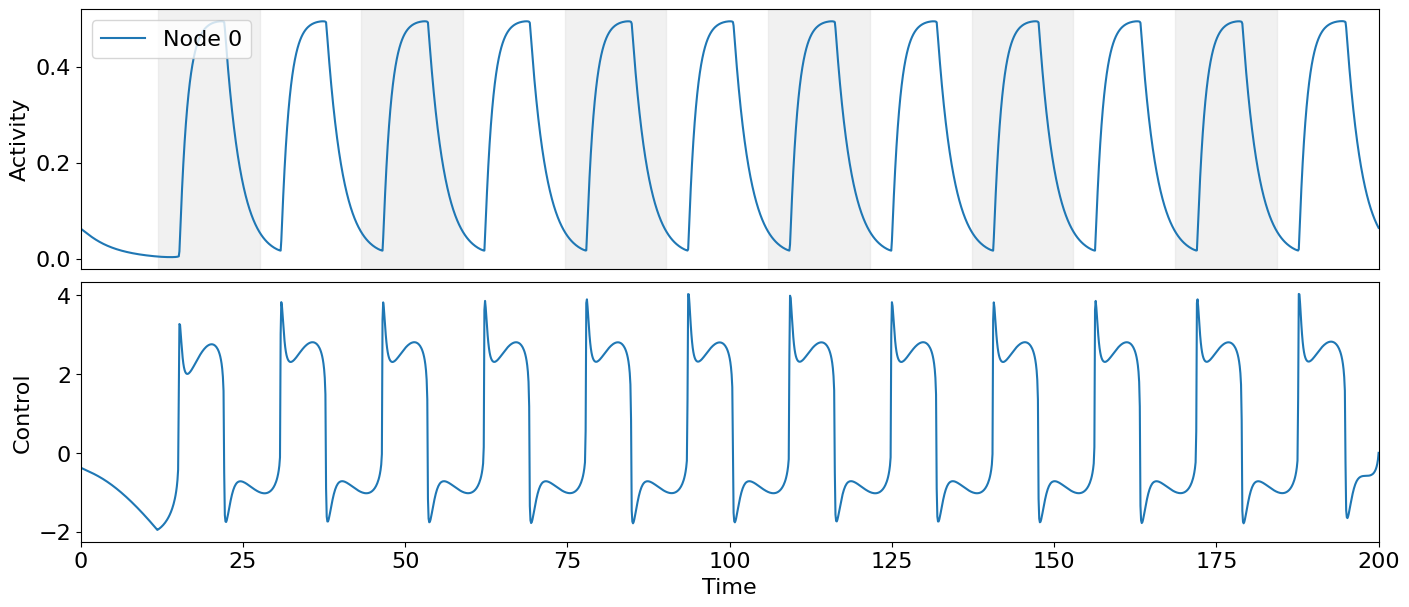

itar =  3
imet =  0
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.18701408027000113
Converged in iteration 4 with cost -0.18701408027000194
Final cost : -0.18701408027000194


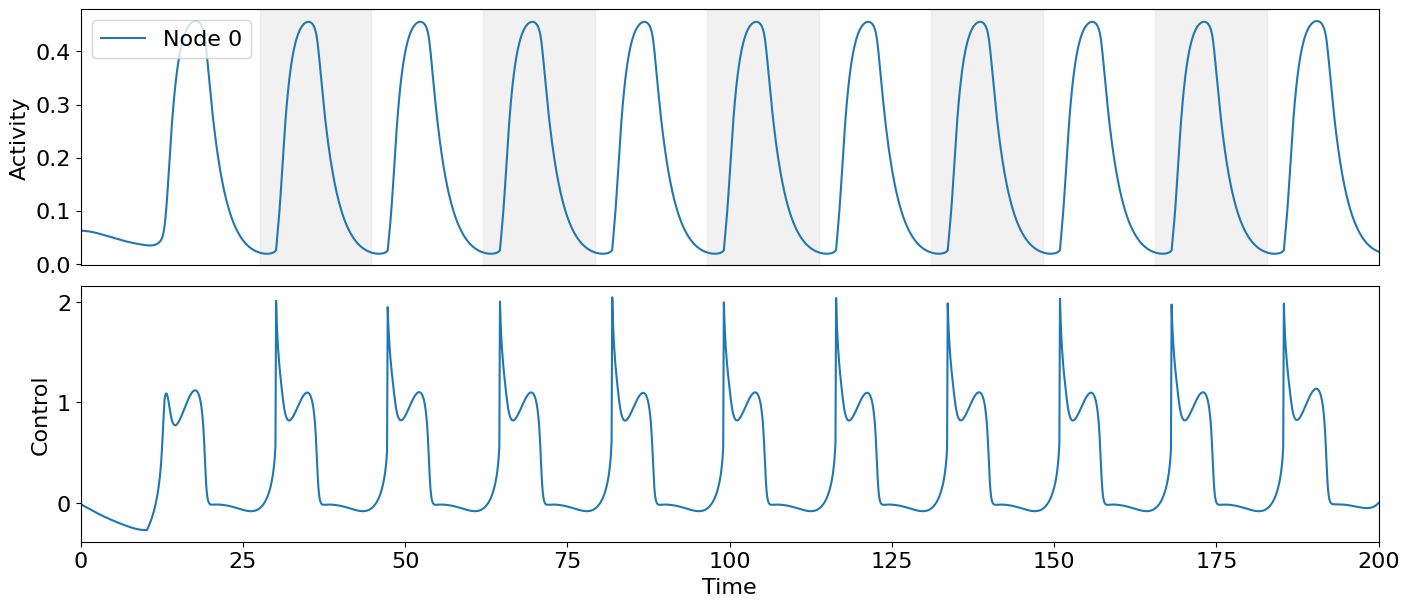

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.2586202541508742
Cost in iteration 10: -0.2586210881862017
Cost in iteration 20: -0.25862510834359065
Cost in iteration 30: -0.2586289344890258
Cost in iteration 40: -0.25863287401616275
Cost in iteration 50: -0.258637884902702
Cost in iteration 60: -0.25864136263160104
Cost in iteration 70: -0.2586455453866332
Cost in iteration 80: -0.2586498162181663
Cost in iteration 90: -0.25865443817184053
Cost in iteration 100: -0.2586595867930999
Final cost : -0.2589217598496631


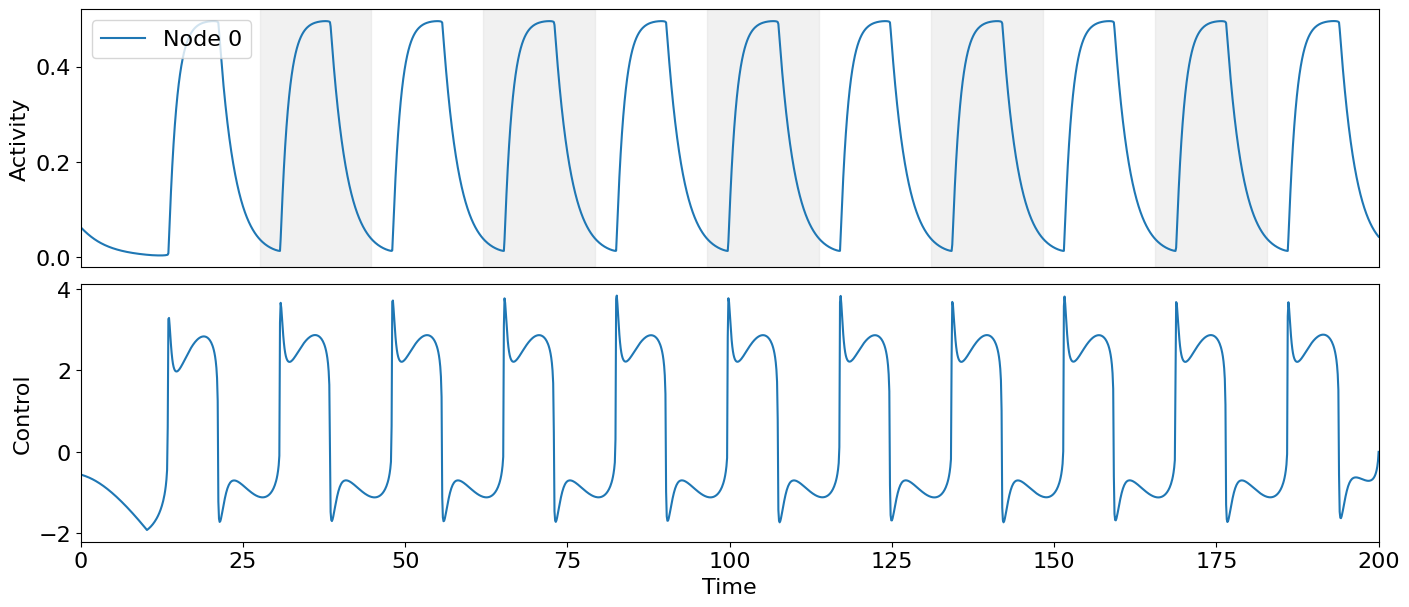

itar =  4
imet =  0
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.20055489697394968
Cost in iteration 10: -0.20055610608166707
Cost in iteration 20: -0.20055705482174405
Cost in iteration 30: -0.200557940894996
Cost in iteration 40: -0.2005587602396524
Cost in iteration 50: -0.20055965443064555
Cost in iteration 60: -0.20056043133522955
Cost in iteration 70: -0.2005611607226595
Cost in iteration 80: -0.20056184106754896
Cost in iteration 90: -0.20056253035869387
Cost in iteration 100: -0.20056316459011914
Final cost : -0.20057245942766555


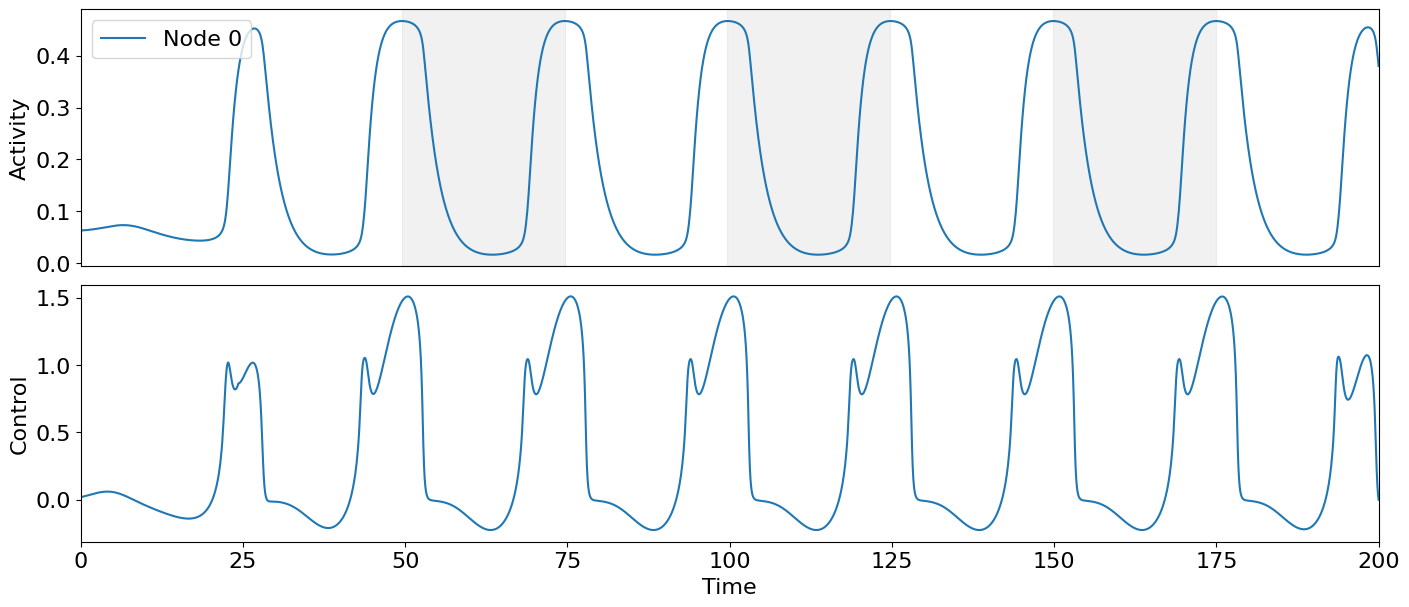

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.2820761093200458
Converged in iteration 2 with cost -0.2820761093200458
Final cost : -0.2820761093200458


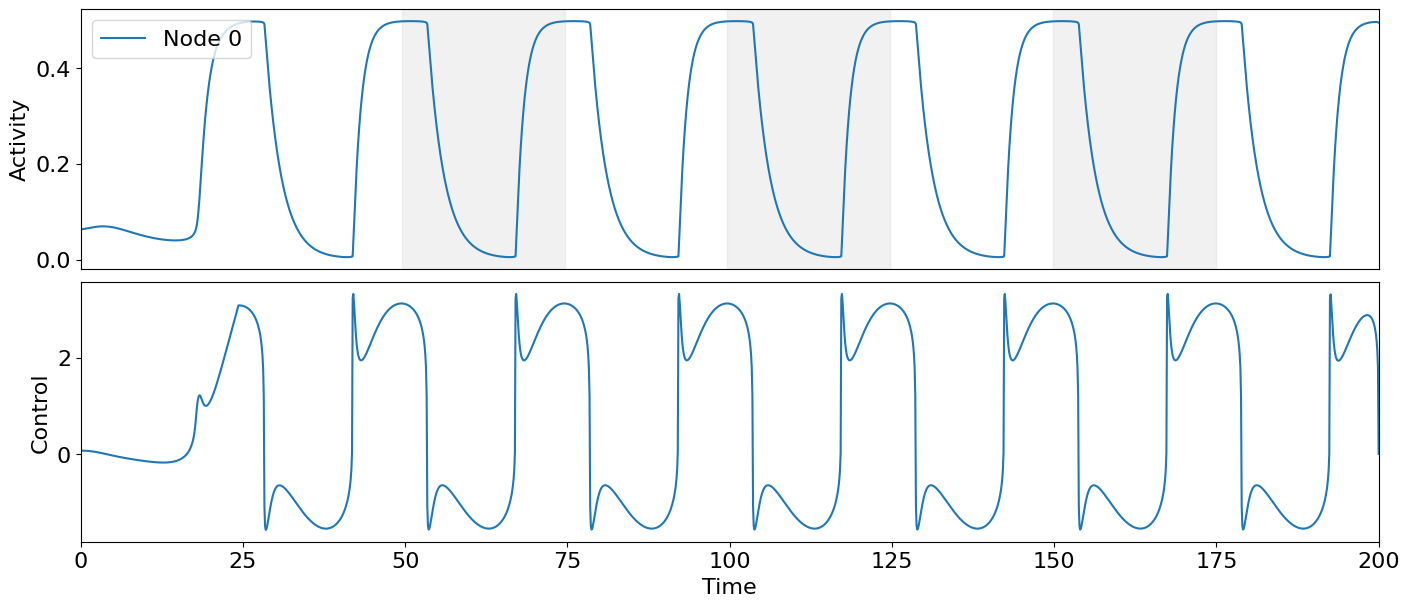

pind =  1
itar =  0
imet =  0
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.07064258059073103
Cost in iteration 10: -0.07064276659122887
Cost in iteration 20: -0.07064295233204115
Cost in iteration 30: -0.07064313783870307
Cost in iteration 40: -0.07064332292326458
Cost in iteration 50: -0.07064350757538242
Cost in iteration 60: -0.070643691707303
Cost in iteration 70: -0.07064387520670529
Cost in iteration 80: -0.07064405793797245
Cost in iteration 90: -0.07064423972894845
Cost in iteration 100: -0.07064444268604428
Final cost : -0.0706499907337092


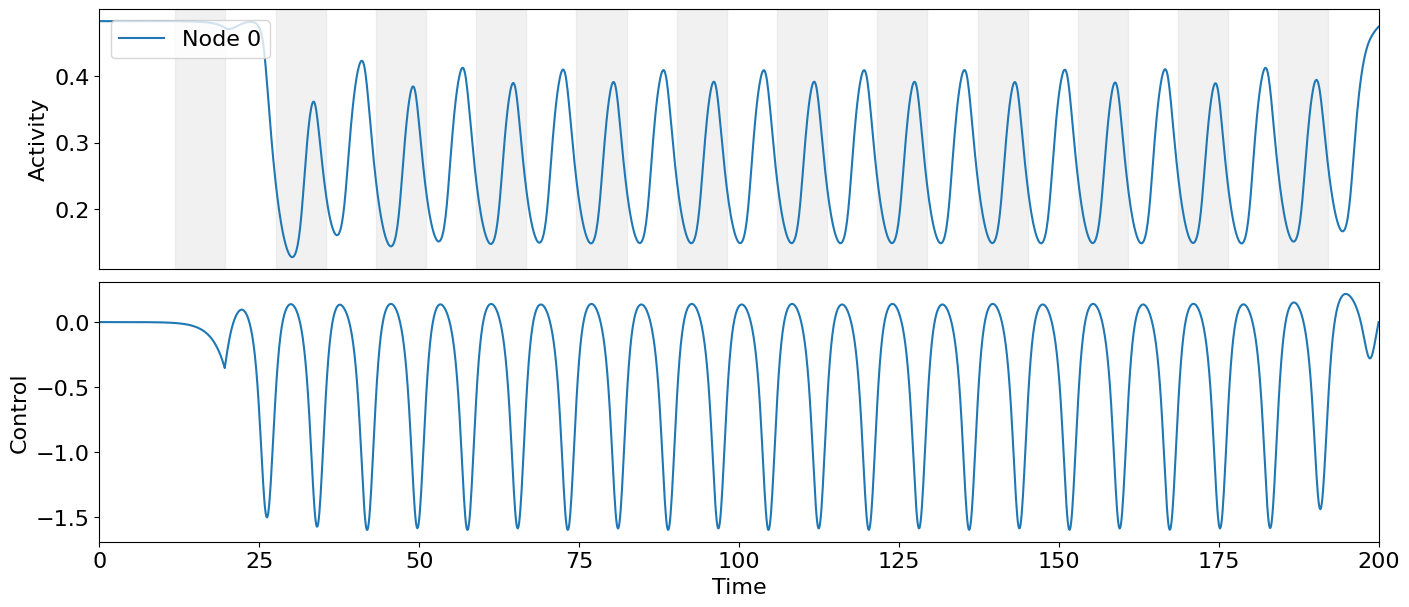

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.0671144573054892
Cost in iteration 10: -0.06711603152705603
Cost in iteration 20: -0.06711751071211891
Cost in iteration 30: -0.06711904010892168
Cost in iteration 40: -0.0671205035989043
Cost in iteration 50: -0.06712203048956233
Cost in iteration 60: -0.06712345795585795
Cost in iteration 70: -0.06712482282746009
Cost in iteration 80: -0.06712620792644527
Cost in iteration 90: -0.0671275219708972
Cost in iteration 100: -0.06712885594789073
Final cost : -0.0671624892042794


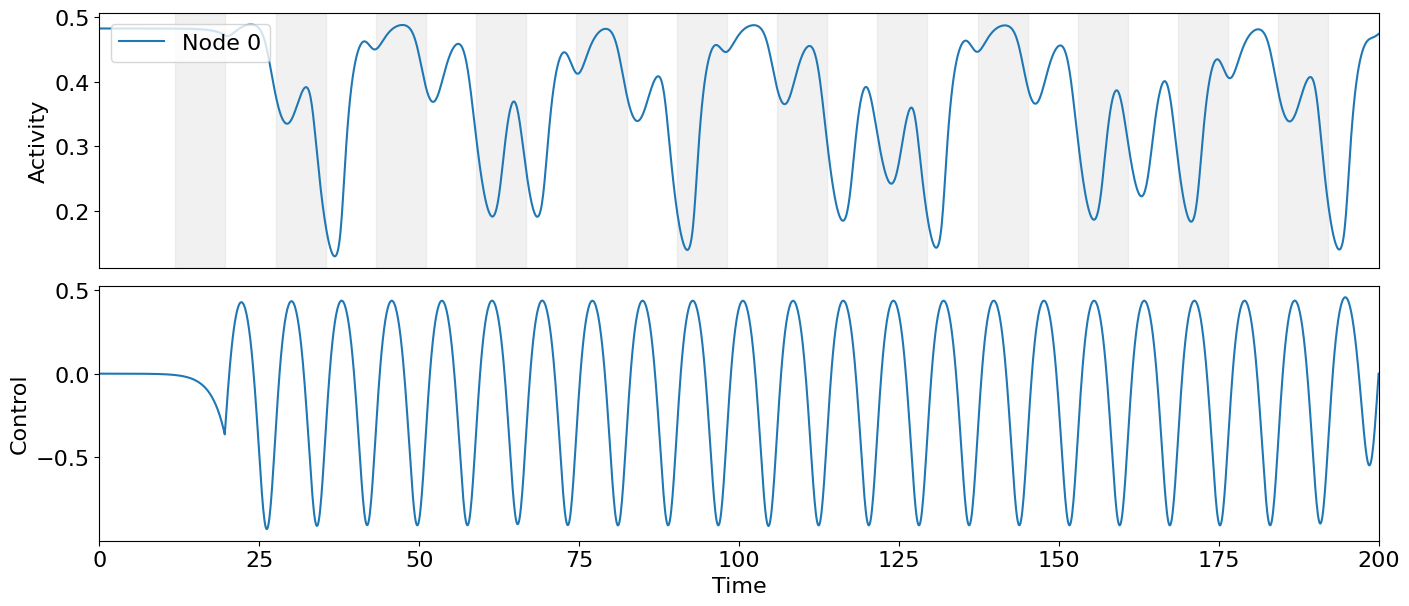

itar =  1
imet =  0
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.18657458486834735
Cost in iteration 10: -0.18658169419417184
Cost in iteration 20: -0.18658898961188697
Cost in iteration 30: -0.18659543900448713
Cost in iteration 40: -0.18660283294489516
Cost in iteration 50: -0.186609040562072
Cost in iteration 60: -0.1866143451144643
Cost in iteration 70: -0.1866196336055749
Cost in iteration 80: -0.18662461525974494
Cost in iteration 90: -0.18662922927846898
Cost in iteration 100: -0.18663429160659867
Final cost : -0.18673326846540003


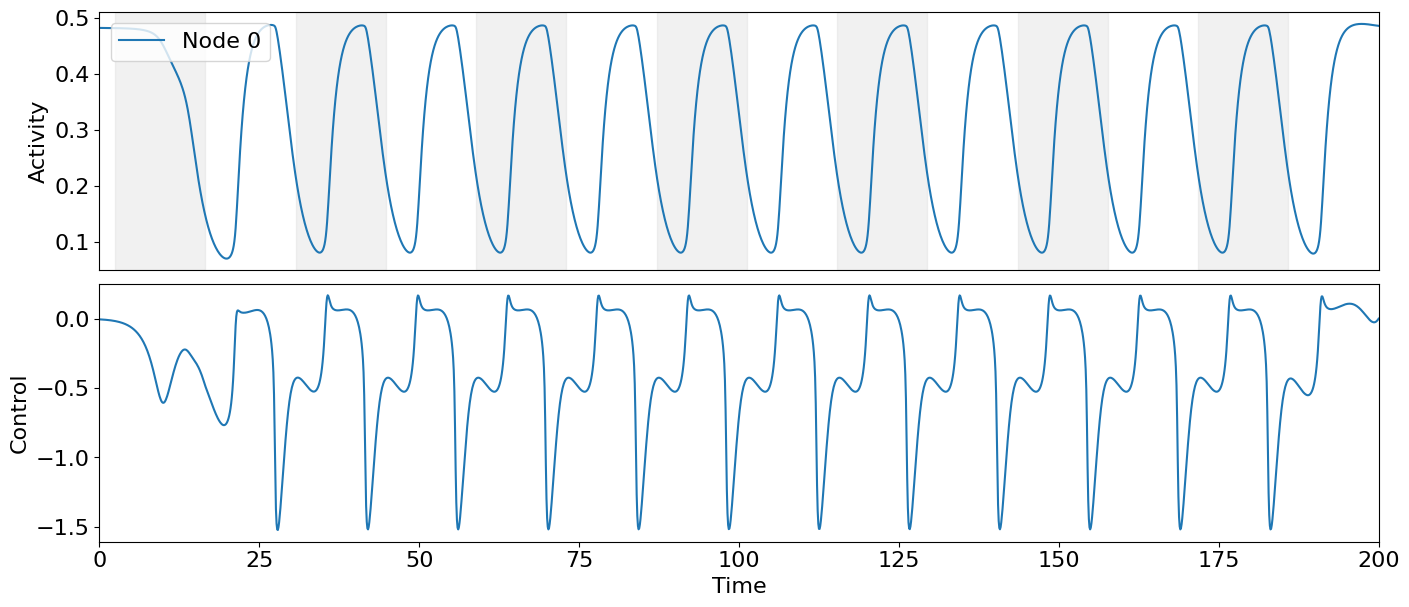

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.24221404360685914
Cost in iteration 10: -0.24222672950410215
Cost in iteration 20: -0.24223535351606698
Cost in iteration 30: -0.24224480002339982
Cost in iteration 40: -0.24225574923712584
Cost in iteration 50: -0.24226645132320457
Cost in iteration 60: -0.24227648209679384
Cost in iteration 70: -0.24228649232720273
Cost in iteration 80: -0.24229648029541567
Cost in iteration 90: -0.24230608216228516
Cost in iteration 100: -0.2423146488382216
Final cost : -0.24265549882933973


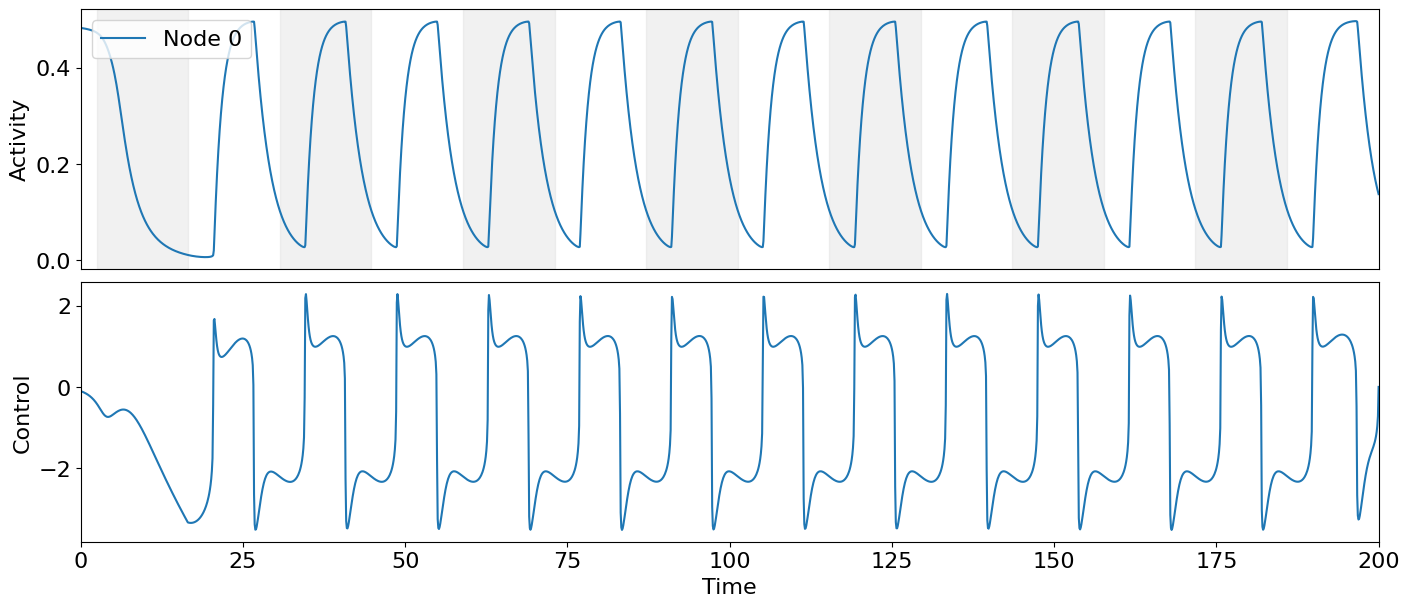

itar =  2
imet =  0
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.19459862863329533
Cost in iteration 10: -0.1945989271650877
Cost in iteration 20: -0.19459923122420797
Cost in iteration 30: -0.19459955622121677
Cost in iteration 40: -0.19459981067087787
Cost in iteration 50: -0.19460011379473044
Cost in iteration 60: -0.19460044538930854
Cost in iteration 70: -0.1946007402461537
Cost in iteration 80: -0.19460107173574082
Cost in iteration 90: -0.1946013899767798
Cost in iteration 100: -0.19460168304277953
Final cost : -0.19461210042841856


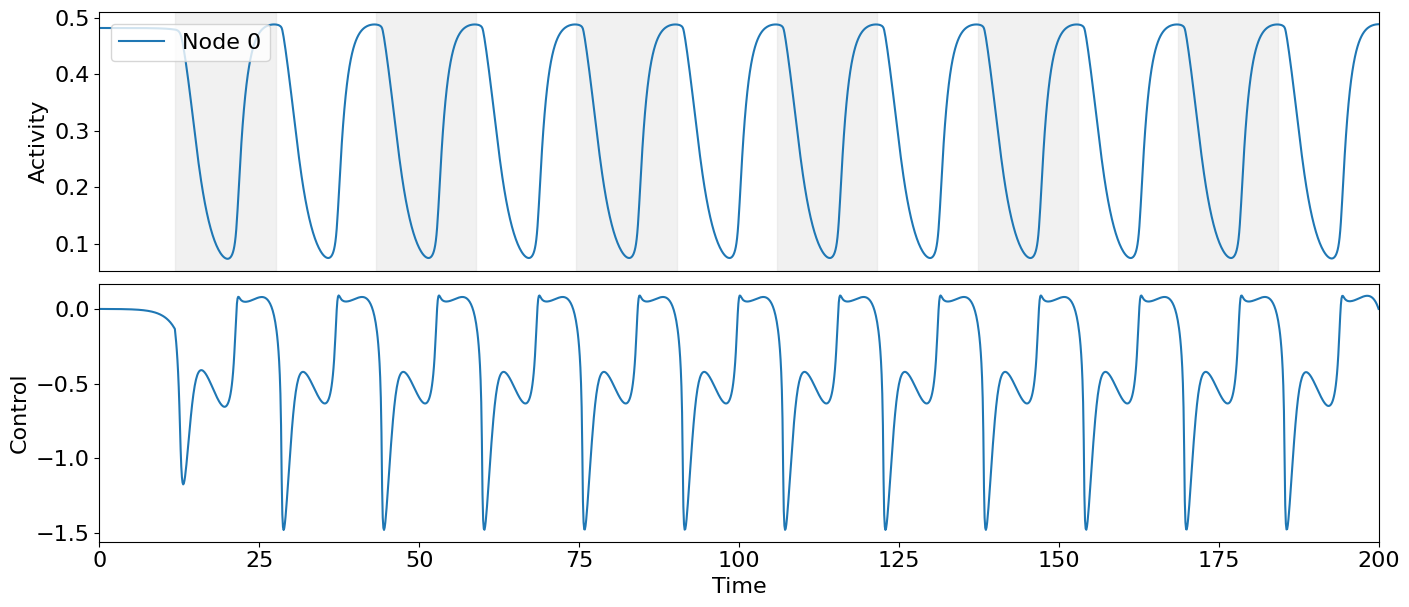

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.2525371098580692
Cost in iteration 10: -0.25256314172425237
Cost in iteration 20: -0.2526555606506547
Cost in iteration 30: -0.2527564891727618
Cost in iteration 40: -0.2528390945322077
Cost in iteration 50: -0.25291780472491343
Cost in iteration 60: -0.2529974742762291
Cost in iteration 70: -0.25307301175074154
Cost in iteration 80: -0.25314632270419934
Cost in iteration 90: -0.2532167801100543
Cost in iteration 100: -0.2532840708640465
Final cost : -0.25378013753689005


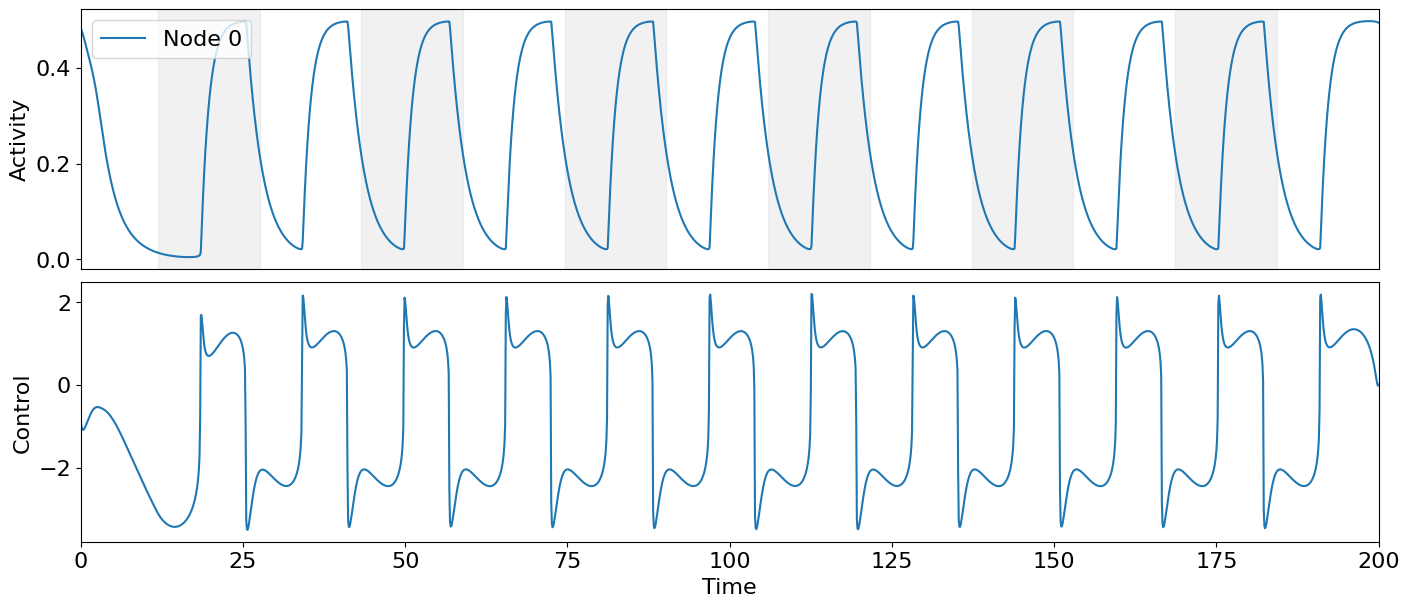

itar =  3
imet =  0
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.1995732554842251
Cost in iteration 10: -0.1995935956860193
Cost in iteration 20: -0.19962297578887164
Cost in iteration 30: -0.19964717014072678
Cost in iteration 40: -0.1996729152868553
Cost in iteration 50: -0.19969386786773535
Cost in iteration 60: -0.19971835390488712
Cost in iteration 70: -0.19973826888292134
Cost in iteration 80: -0.19975728177921898
Cost in iteration 90: -0.19977644496966335
Cost in iteration 100: -0.19979442812835604
Final cost : -0.20015446099690107


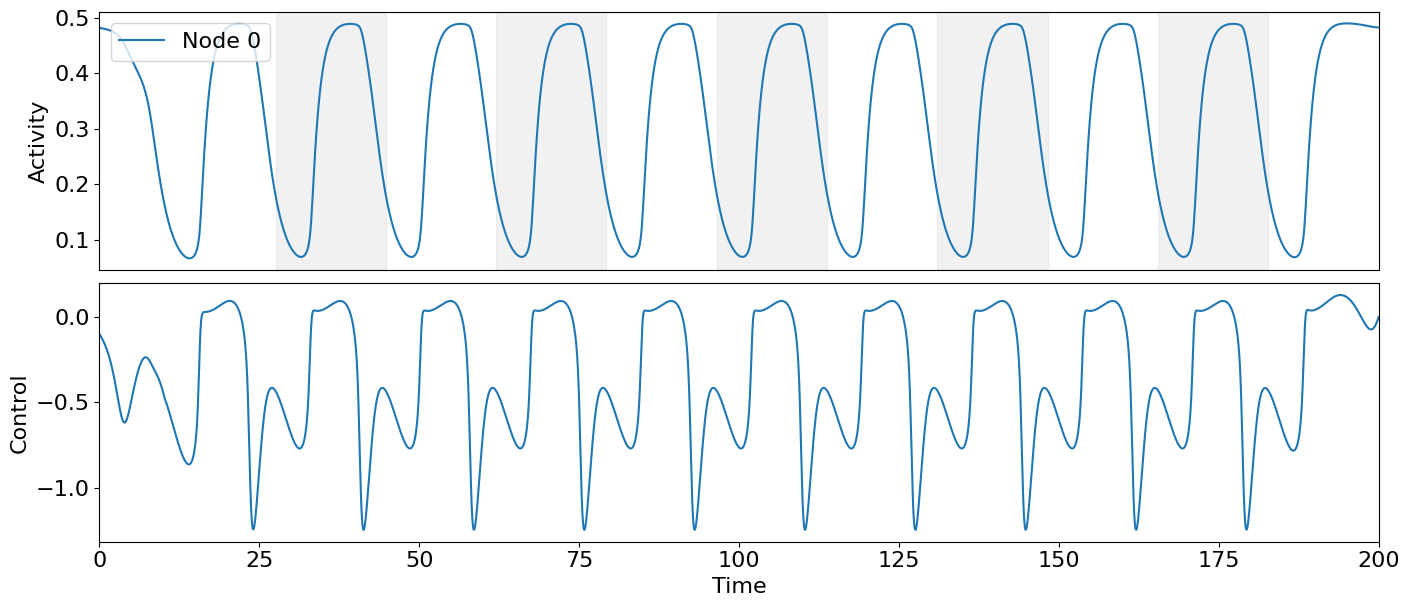

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.2613927945756898
Cost in iteration 10: -0.2613928627637971
Cost in iteration 20: -0.26139314139004904
Cost in iteration 30: -0.2613933565227246
Cost in iteration 40: -0.26139355882010956
Cost in iteration 50: -0.2613937086487049
Cost in iteration 60: -0.26139387982436274
Cost in iteration 70: -0.2613940000375561
Cost in iteration 80: -0.26139411717560224
Cost in iteration 90: -0.26139423373317844
Cost in iteration 100: -0.2613943063804507
Final cost : -0.26139481633509354


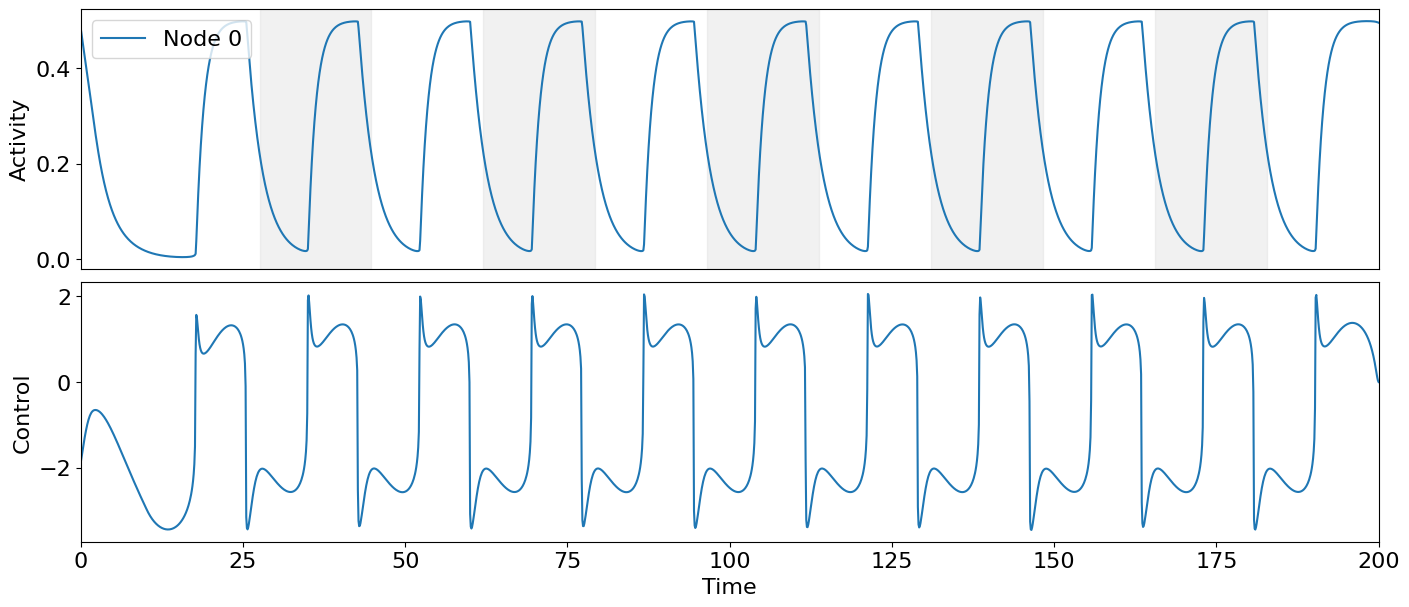

itar =  4
imet =  0
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.20714504994512148
Cost in iteration 10: -0.207147447976237
Cost in iteration 20: -0.20714905327751737
Cost in iteration 30: -0.2071504971242939
Cost in iteration 40: -0.20715215462978293
Cost in iteration 50: -0.20715387650951572
Cost in iteration 60: -0.20715553569755157
Cost in iteration 70: -0.20715724545802805
Cost in iteration 80: -0.20715890383674898
Cost in iteration 90: -0.20716060575142758
Cost in iteration 100: -0.20716201210143842
Final cost : -0.2071890898366585


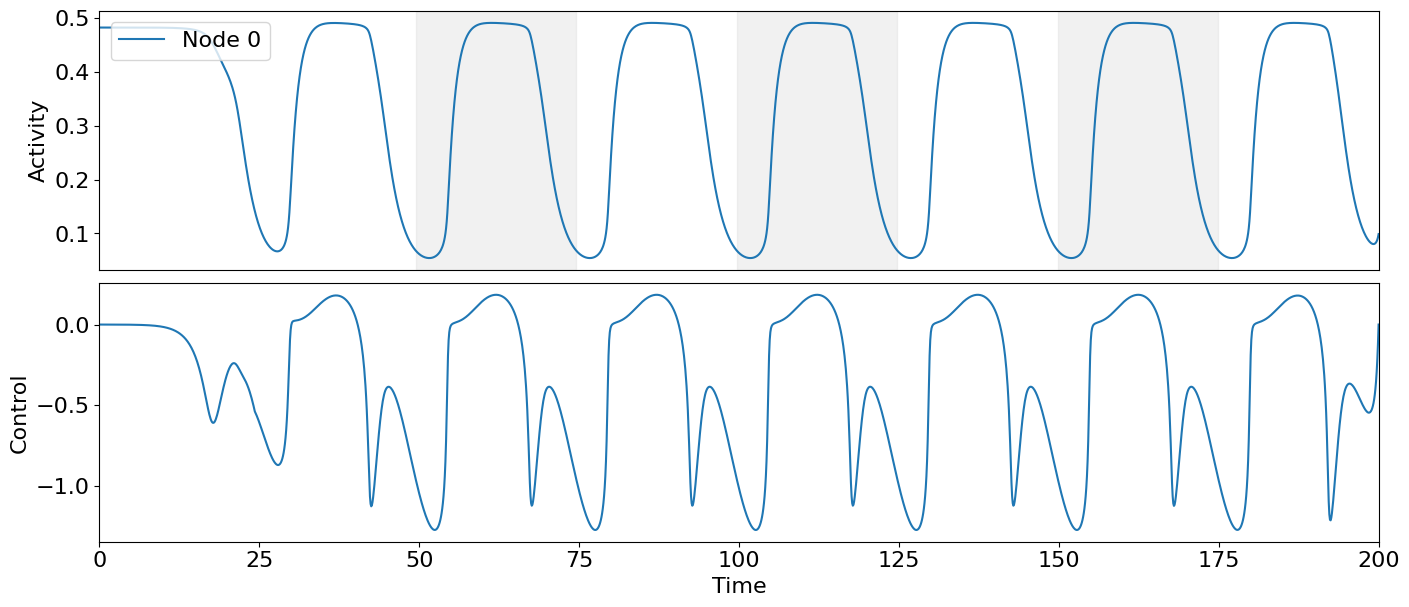

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.2818276053710145
Cost in iteration 10: -0.28182780297001947
Cost in iteration 20: -0.281827945444833
Cost in iteration 30: -0.28182804607987577
Cost in iteration 40: -0.2818281271322194
Cost in iteration 50: -0.28182821953174736
Cost in iteration 60: -0.28182829504359935
Cost in iteration 70: -0.2818283613769498
Cost in iteration 80: -0.2818284189125456
Cost in iteration 90: -0.28182848222613527
Cost in iteration 100: -0.2818285458245238
Final cost : -0.2818385447568158


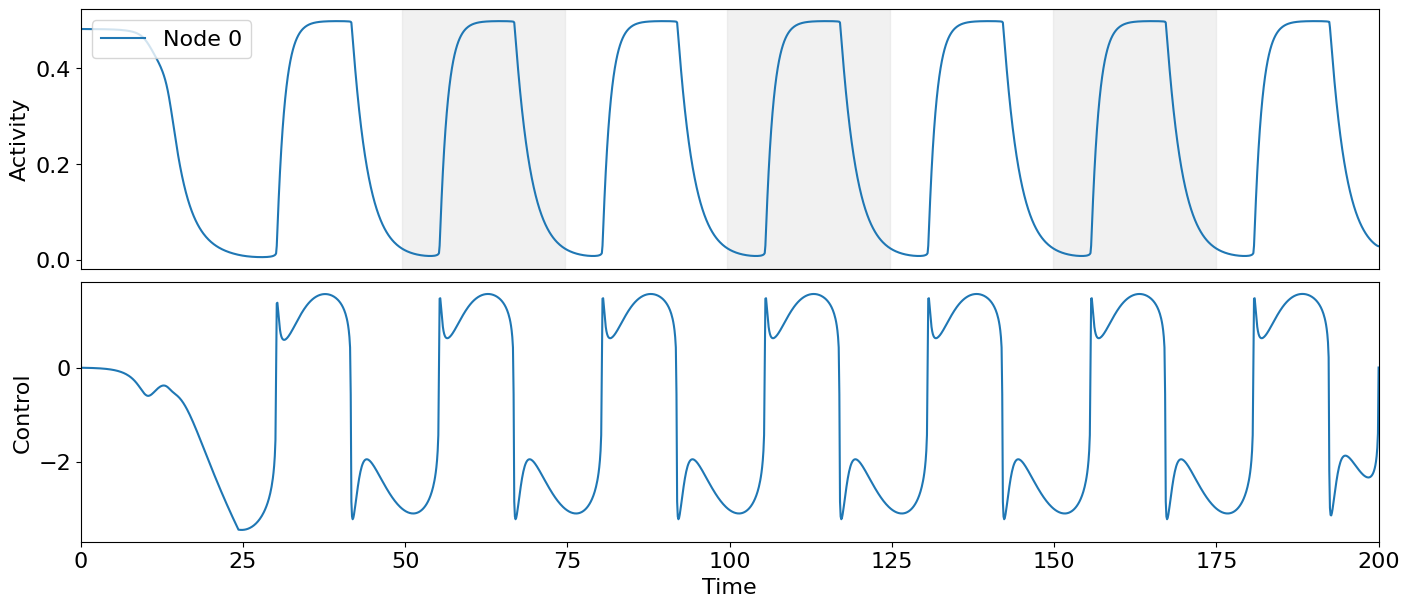

pind =  2
itar =  0
imet =  0
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.07250497513786772
Cost in iteration 10: -0.0726460998138458
Cost in iteration 20: -0.0727609050394451
Cost in iteration 30: -0.07285800795506109
Cost in iteration 40: -0.07295735303530976
Cost in iteration 50: -0.0730516777241296
Cost in iteration 60: -0.07313483835744025
Cost in iteration 70: -0.07321880934914587
Cost in iteration 80: -0.07329952438908761
Cost in iteration 90: -0.07338390655798602
Cost in iteration 100: -0.07347227116093112
Final cost : -0.07444334516506934


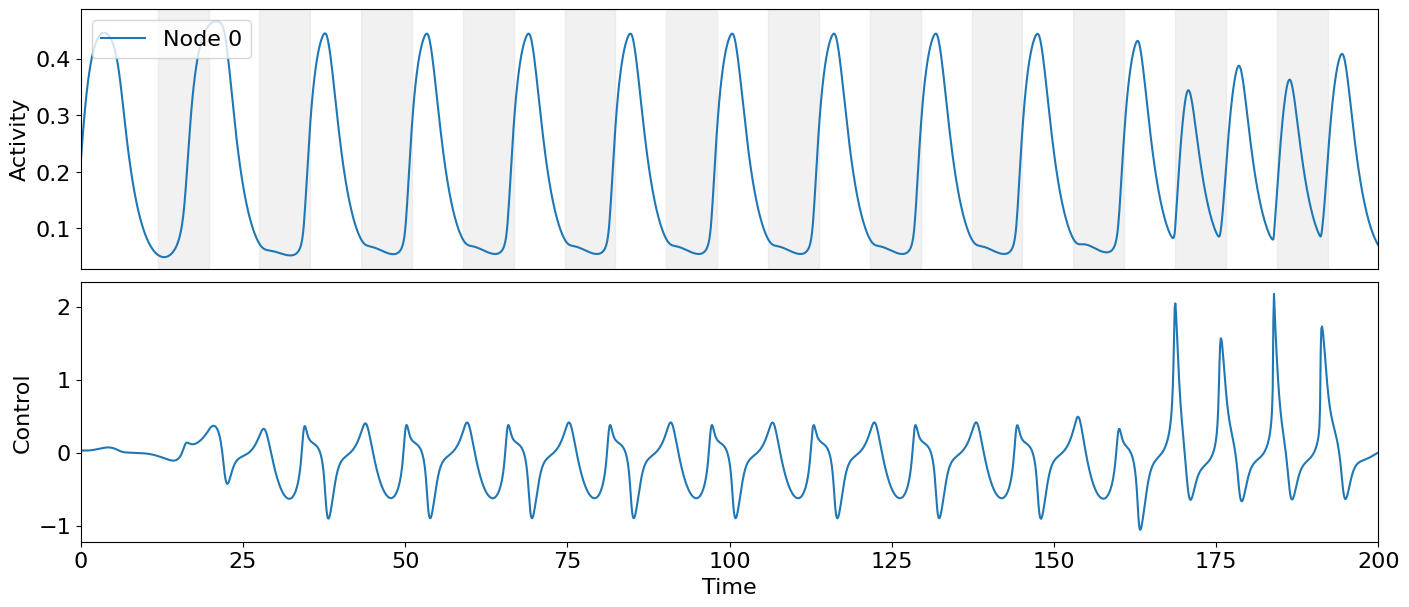

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.17670559840602865
Cost in iteration 10: -0.17670841564956952
Cost in iteration 20: -0.17672522372080346
Cost in iteration 30: -0.17673405976970338
Cost in iteration 40: -0.1767480964777769
Cost in iteration 50: -0.1767566472823556
Cost in iteration 60: -0.1767638126741853
Cost in iteration 70: -0.17677382144143935
Cost in iteration 80: -0.17678431059005278
Cost in iteration 90: -0.17679051614271604
Cost in iteration 100: -0.17679452007146781
Final cost : -0.17682129406985006


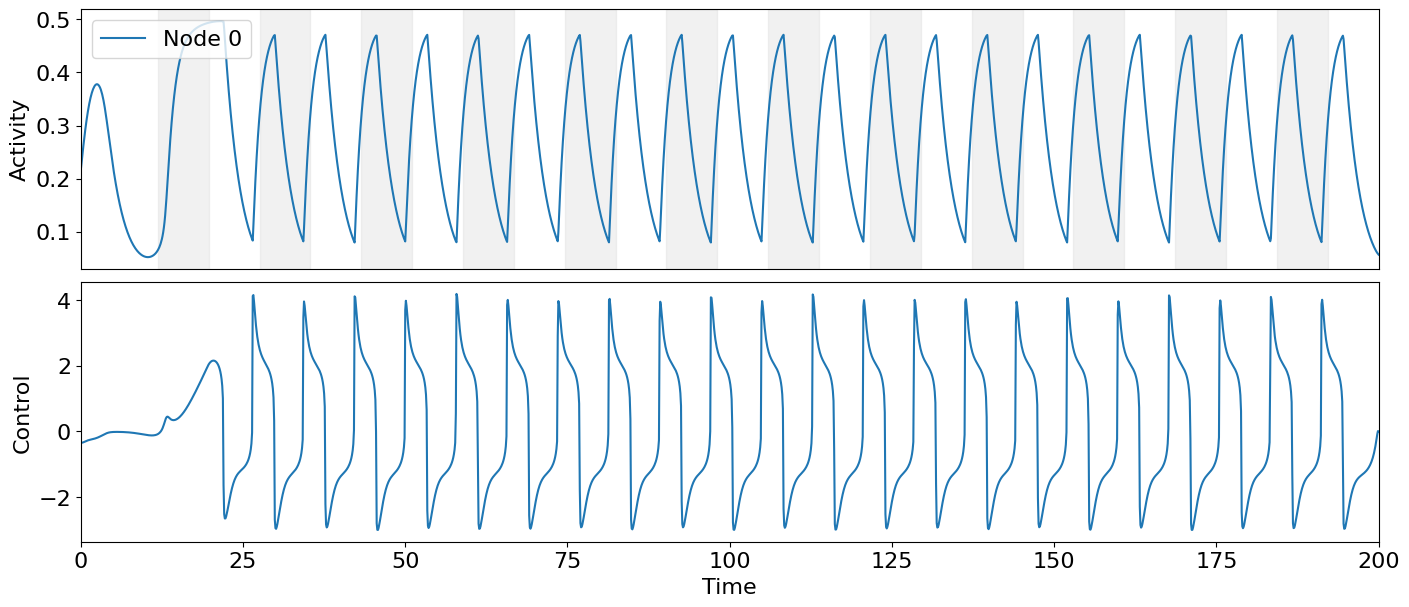

itar =  1
imet =  0
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.21280507561697912
Cost in iteration 10: -0.21282380326439734
Cost in iteration 20: -0.21283585382124082
Cost in iteration 30: -0.2128442467542084
Cost in iteration 40: -0.21285008366749256
Cost in iteration 50: -0.21285413683462534
Cost in iteration 60: -0.2128567603963842
Cost in iteration 70: -0.21285887733181338
Cost in iteration 80: -0.2128602954403091
Cost in iteration 90: -0.21286125705913533
Cost in iteration 100: -0.21286186353330214
Final cost : -0.21286344618239145


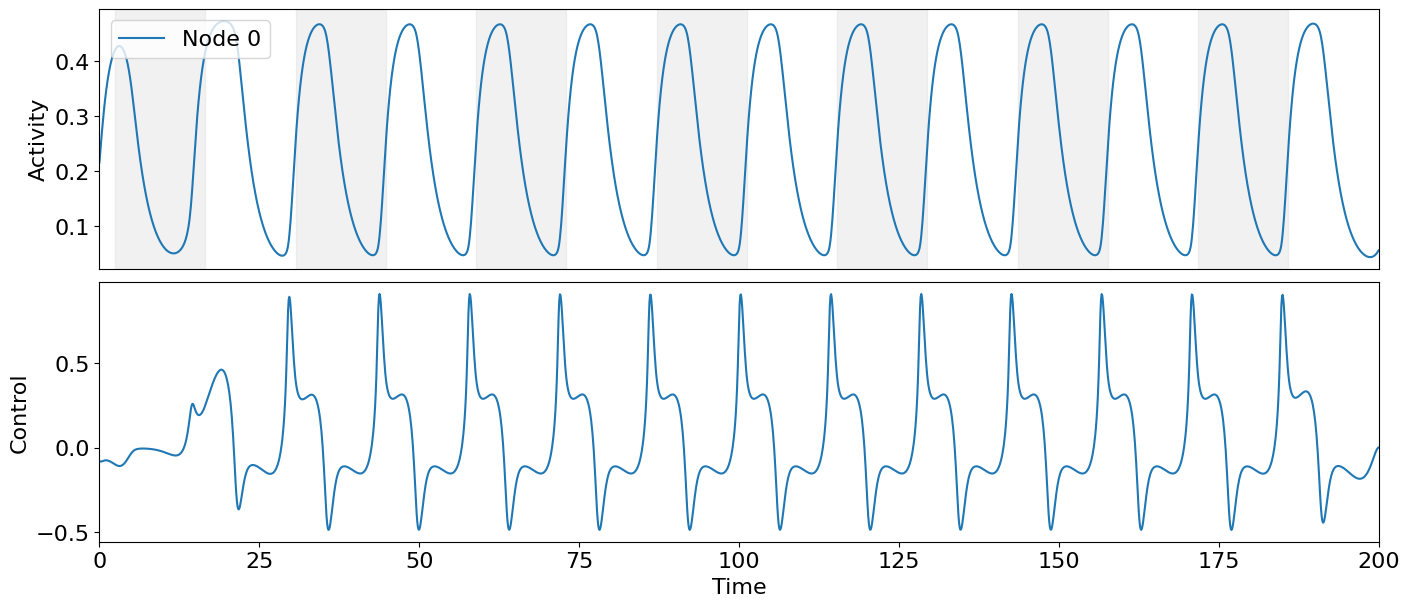

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.24197216684616774
Cost in iteration 10: -0.24197396056982307
Cost in iteration 20: -0.24198157592408828
Cost in iteration 30: -0.24198552005765966
Cost in iteration 40: -0.24198906880033869
Cost in iteration 50: -0.24199168948941985
Cost in iteration 60: -0.24199388341923972
Cost in iteration 70: -0.2419966869618835
Cost in iteration 80: -0.24200055084108826
Cost in iteration 90: -0.24200484042793324
Cost in iteration 100: -0.24200901974490274
Final cost : -0.2421613479358143


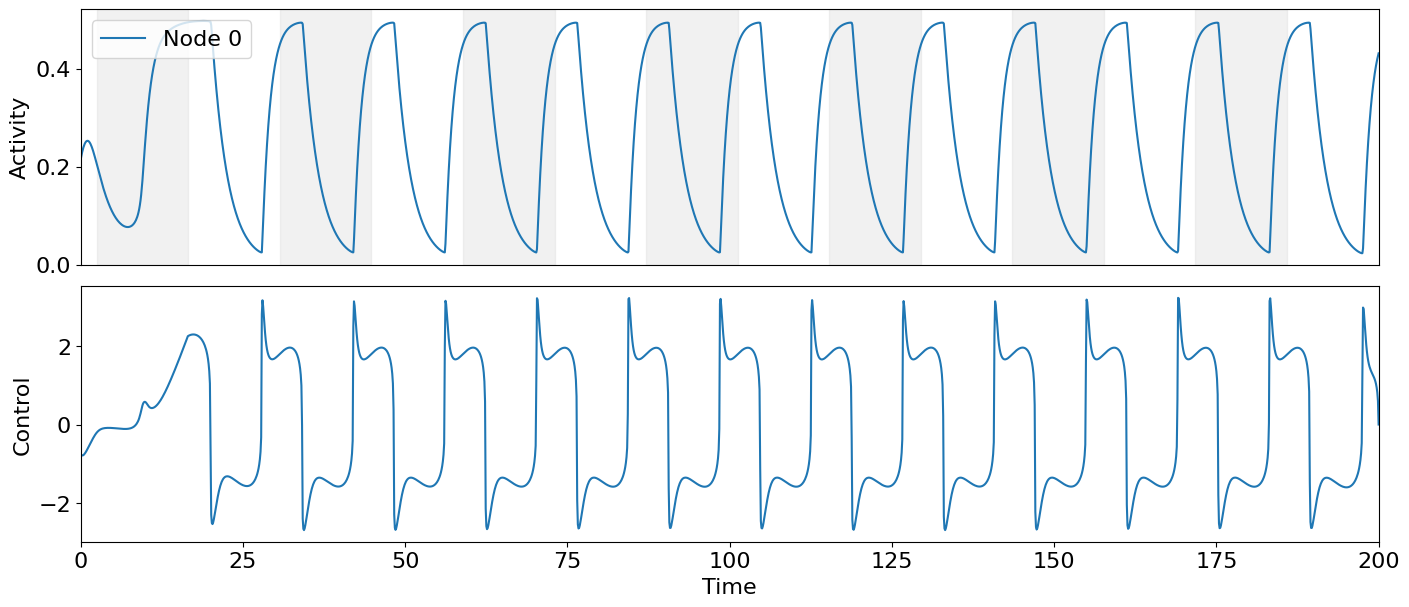

itar =  2
imet =  0
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.22524847906945034
Cost in iteration 10: -0.22526395024794313
Cost in iteration 20: -0.22527364938661176
Cost in iteration 30: -0.22528042439607837
Cost in iteration 40: -0.22528456291527504
Cost in iteration 50: -0.22528719847639955
Cost in iteration 60: -0.22528884279189534
Cost in iteration 70: -0.22529007087439265
Cost in iteration 80: -0.22529076591271216
Cost in iteration 90: -0.22529123428952297
Cost in iteration 100: -0.2252915243262758
Final cost : -0.22529203860029134


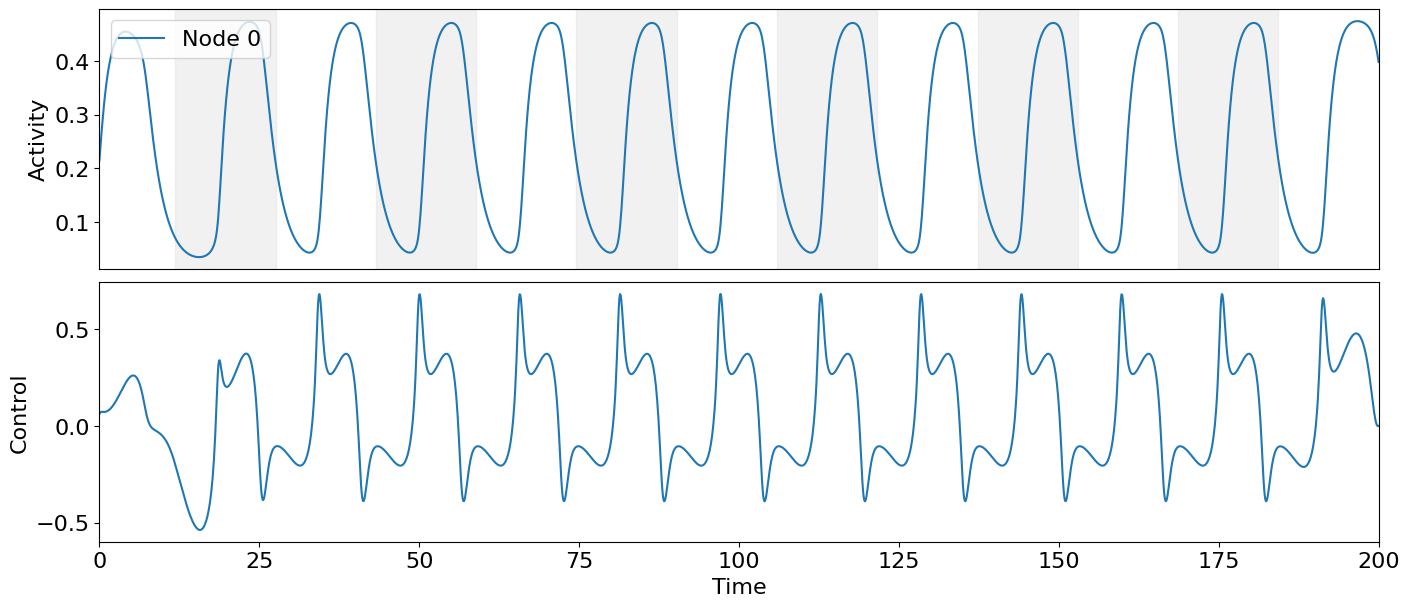

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.2522279331193322
Cost in iteration 10: -0.25223891933460413
Cost in iteration 20: -0.25227889125548325
Cost in iteration 30: -0.2523207512108073
Cost in iteration 40: -0.25236241351883604
Cost in iteration 50: -0.25240775956554895
Cost in iteration 60: -0.252455368378968
Cost in iteration 70: -0.2525034651469816
Cost in iteration 80: -0.25255534571382277
Cost in iteration 90: -0.2526081785808503
Cost in iteration 100: -0.2526644815134214
Final cost : -0.2546658805583453


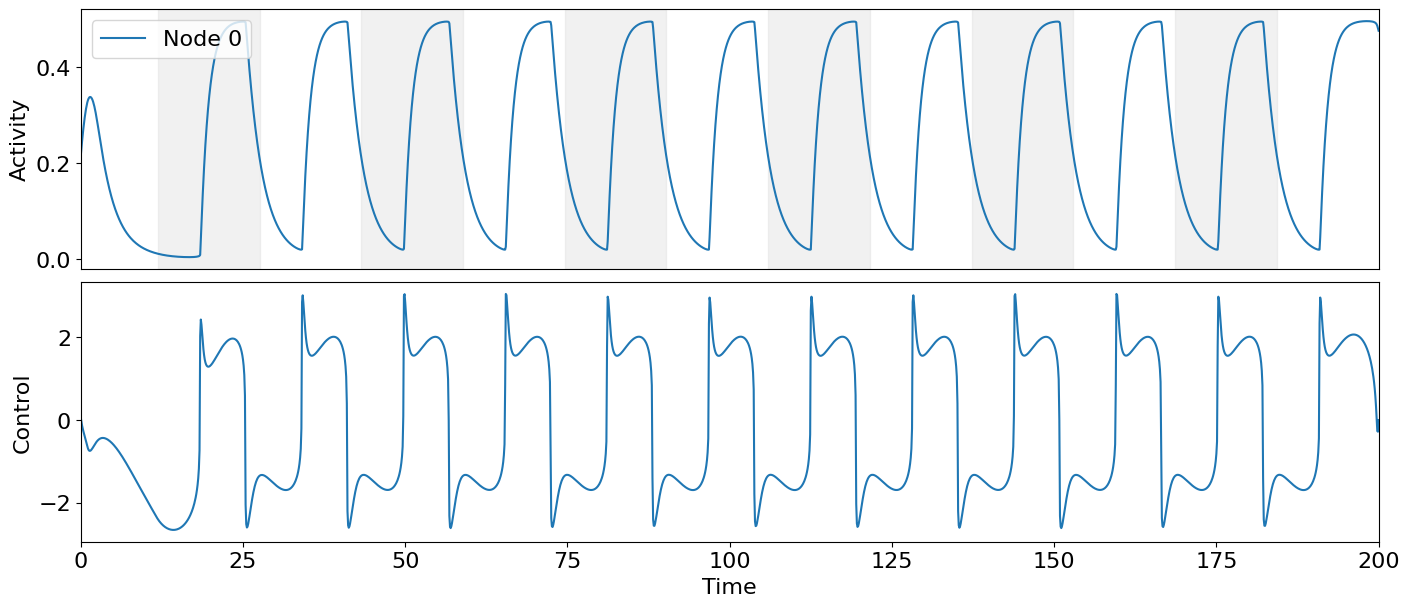

itar =  3
imet =  0
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.2326140176185255
Cost in iteration 10: -0.2326140177472537
Cost in iteration 20: -0.23261401781215085
Cost in iteration 30: -0.2326140178521812
Cost in iteration 40: -0.23261401787285976
Cost in iteration 50: -0.23261401788544306
Cost in iteration 60: -0.2326140178920463
Cost in iteration 70: -0.23261401789601882
Cost in iteration 80: -0.23261401789813552
Cost in iteration 90: -0.2326140178993977
Cost in iteration 100: -0.23261401790008174
Converged in iteration 196 with cost -0.23261401790102457
Final cost : -0.23261401790102457


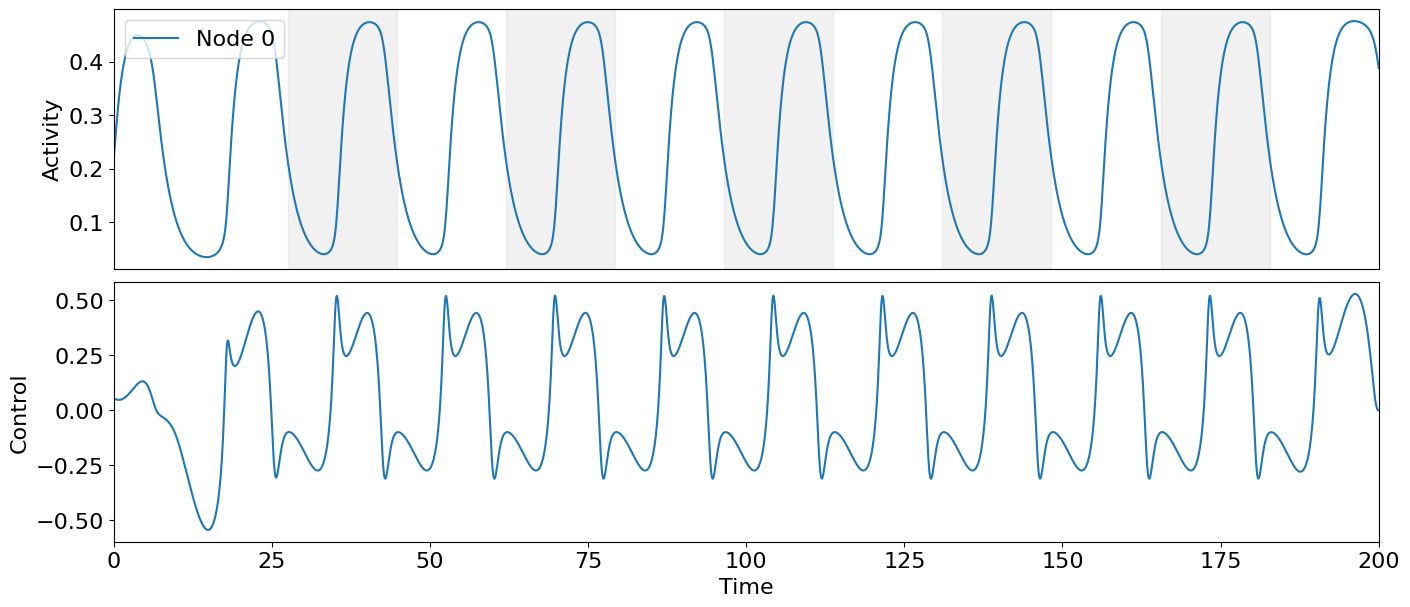

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.2623069958355749
Cost in iteration 10: -0.2623071994543505
Cost in iteration 20: -0.2623076077846691
Cost in iteration 30: -0.2623078578340715
Cost in iteration 40: -0.26230806935291284
Cost in iteration 50: -0.26230825244730194
Cost in iteration 60: -0.26230841390602194
Cost in iteration 70: -0.26230856028574245
Cost in iteration 80: -0.26230869304405624
Cost in iteration 90: -0.2623088116743193
Cost in iteration 100: -0.262308919990364
Final cost : -0.2623101253967122


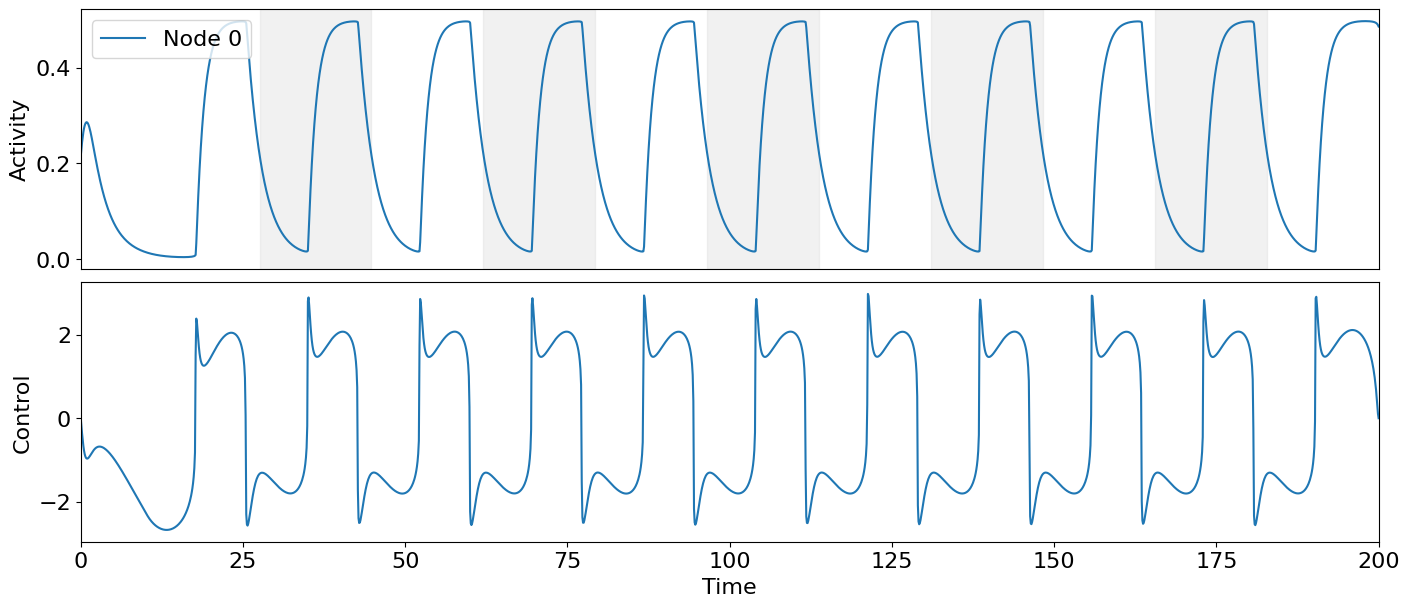

itar =  4
imet =  0
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.2407207793698722
Cost in iteration 10: -0.2407222115602773
Cost in iteration 20: -0.24072315601507574
Cost in iteration 30: -0.24072421116377934
Cost in iteration 40: -0.24072509553065793
Cost in iteration 50: -0.24072609746992182
Cost in iteration 60: -0.24072691100175161
Cost in iteration 70: -0.24072787181043342
Cost in iteration 80: -0.24072872776285736
Cost in iteration 90: -0.2407295388080749
Cost in iteration 100: -0.24073035638958223
Final cost : -0.2407457556460318


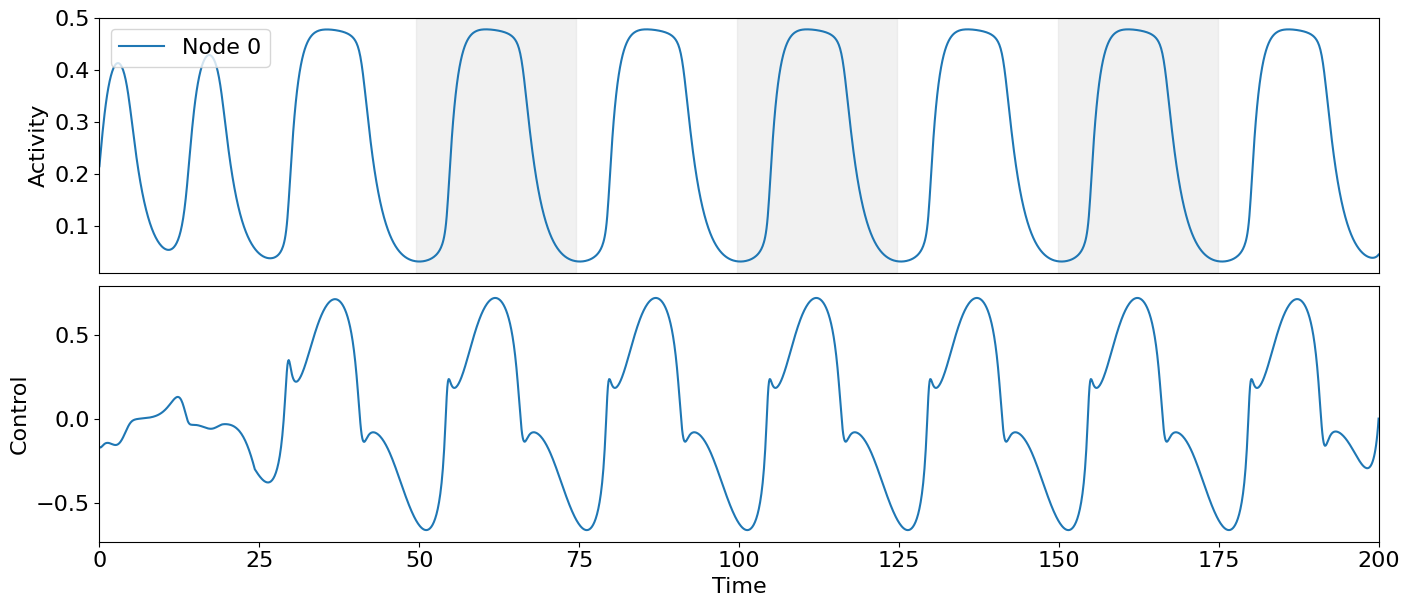

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.2828160449320115
Cost in iteration 10: -0.2828162043479431
Cost in iteration 20: -0.28281635952664963
Cost in iteration 30: -0.2828165067589052
Cost in iteration 40: -0.28281663185301403
Cost in iteration 50: -0.28281675835153836
Cost in iteration 60: -0.2828169075690113
Cost in iteration 70: -0.2828171000847161
Cost in iteration 80: -0.2828173960574972
Cost in iteration 90: -0.2828178799224907
Cost in iteration 100: -0.2828193253211776
Final cost : -0.28287856214171186


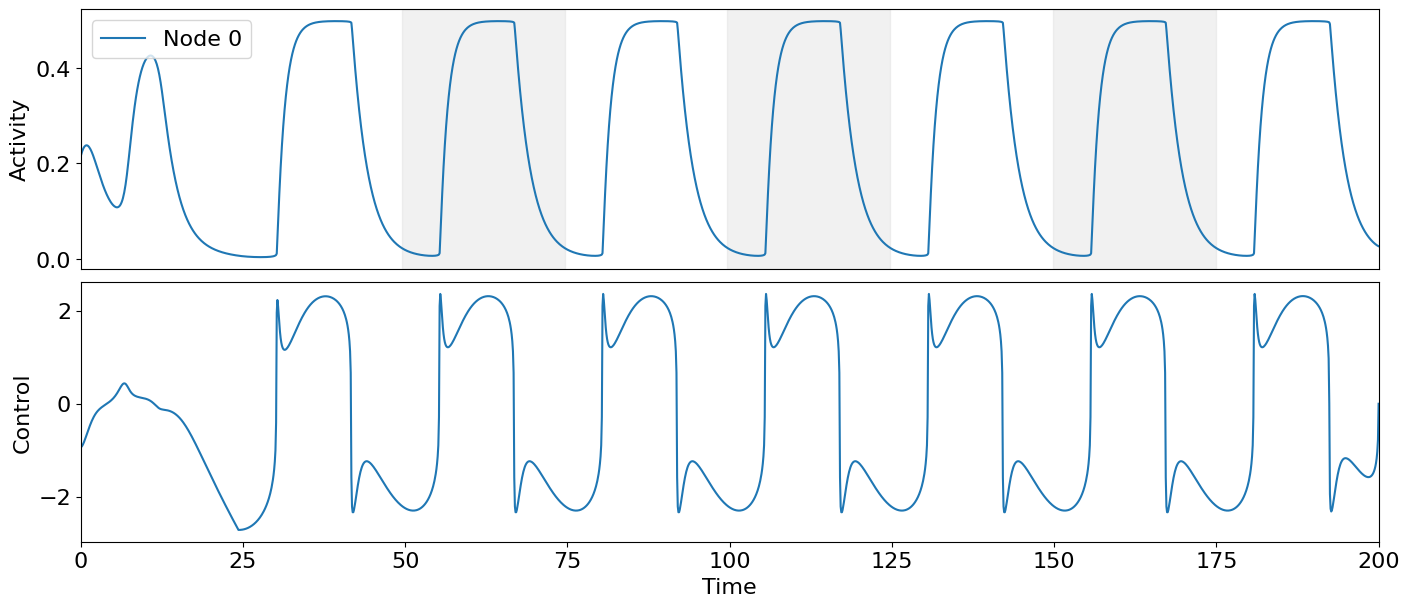

In [21]:
for pind in range(len(comp_points)):

    print("pind = ", pind)

    p = comp_points[pind]
    
    testd = 1000.
    model.params.duration = testd
    test_input = ZeroInput().generate_input(duration=testd+model.params.dt, dt=model.params.dt)
    model.params["exc_ext"] = test_input + p[0]
    model.params["inh_ext"] = test_input + p[1]
    model.run()

    einit = np.zeros((N, nmaxdel+1))
    iinit = np.zeros((N, nmaxdel+1))


    for n in range(N):
        einit[n,:] = model.exc[n,-1]
        iinit[n,:] = model.inh[n,-1]

    model.params.duration = duration

    model.params["exc_ext"] = zero_control[:,0,:] + p[0]
    model.params["inh_ext"] = zero_control[:,0,:] + p[1]

    model.params["exc_init"] = einit
    model.params["inh_init"] = iinit

    model.run()

    for itar in range(len(target_array)):

        print("itar = ", itar)

        target_period = target_array[itar]
        i00 = 0
        int0 = np.around( (duration - i00 * target_period) / model.params.dt, 0).astype(int)     
        while int0 > 250:
            i00 += 1
            int0 = np.around( (duration - i00 * target_period) / model.params.dt, 0).astype(int)

        for imet in range(4):

            if imet != 0:
                continue

            print("imet = ", imet)

            for iw in range(len(w2_array)):

                print("iw = ", iw)
                
                w2 = w2_array[iw]

                model_controlled = oc_wc.OcWc(model, target_period, print_array=pr, cost_interval=(int0,None), cost_matrix=costmat, control_matrix = controlmat)
                model_controlled.maximum_control_strength = maxstr
                model_controlled.weights["w_p"] = 0.
                model_controlled.weights["w_2"] = w2

                if imet in [1,2,3]:
                    init_control = zero_control.copy()
                    tarray = np.arange(int0*dt, int0*dt + 2.*target_period, dt)
                    init_control[0,0,int0:int0+len(tarray)] = np.sin(2.*np.pi *tarray/target_period)
                    init_control[0,1,int0:int0+len(tarray)] = np.sin(2.*np.pi *tarray/target_period)

                    model_controlled.control = init_control.copy()
                    model_controlled.update_input()

                if imet == 0:
                    model_controlled.weights["w_f"] = 1.
                elif imet == 1:
                    model_controlled.weights["w_ac"] = 1.
                elif imet == 2:
                    model_controlled.weights["w_phase"] = 1.
                elif imet == 3:
                    model_controlled.weights["w_var_osc"] = 1.

                if type(results["controls"][pind][itar][imet][iw]) != type(None):
                    model_controlled.control = results["controls"][pind][itar][imet][iw].copy()
                    model_controlled.update_input()

                model_controlled.optimize(it)
                results["controls"][pind][itar][imet][iw] = model_controlled.control.copy()

                timings, periods = getperiods(model_controlled.get_xs(), proms[iw])
                results["timings"][pind][itar][imet][iw] = timings
                results["periods"][pind][itar][imet][iw] = periods

                fname = str(pind) + "_" + str(itar) + "_" + str(imet) + "_" + str(iw) + ".png"

                if imet in [0,1,2]: plot_oc_nw(N, duration, dt, model_controlled.get_xs(), target_period,  model_controlled.control, filename= os.path.join(dir, fname))
                else: plot_oc_nw(N, duration, dt, model_controlled.get_xs(), duration,  model_controlled.control, filename= os.path.join(dir, fname))

In [22]:
with open('osc_1n.pickle', 'wb') as f:
    pickle.dump(results, f)

In [6]:
with open('osc_1n.pickle', 'rb') as f:
    res_read = pickle.load(f)
    print(res_read.keys() )

results = res_read.copy()

dict_keys(['controls', 'periods', 'timings'])


In [16]:
xl = [ ["Down F", "Up F", "Osc F"], ["Down AC", "Up AC", "Osc AC"], ["Down Phase", "Up Phase", "Osc Phase"], ["Down Var", "Up Var", "Osc Var"] ]

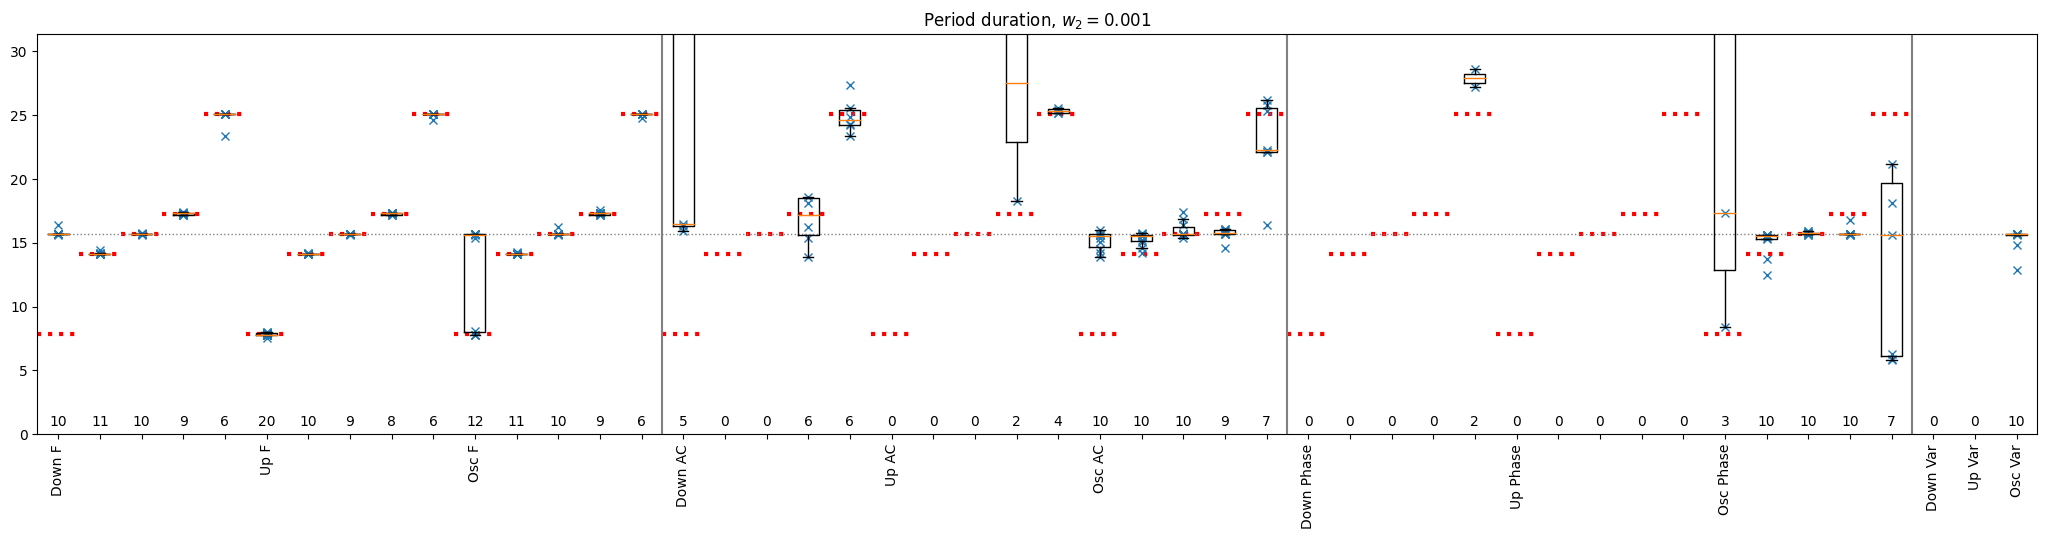

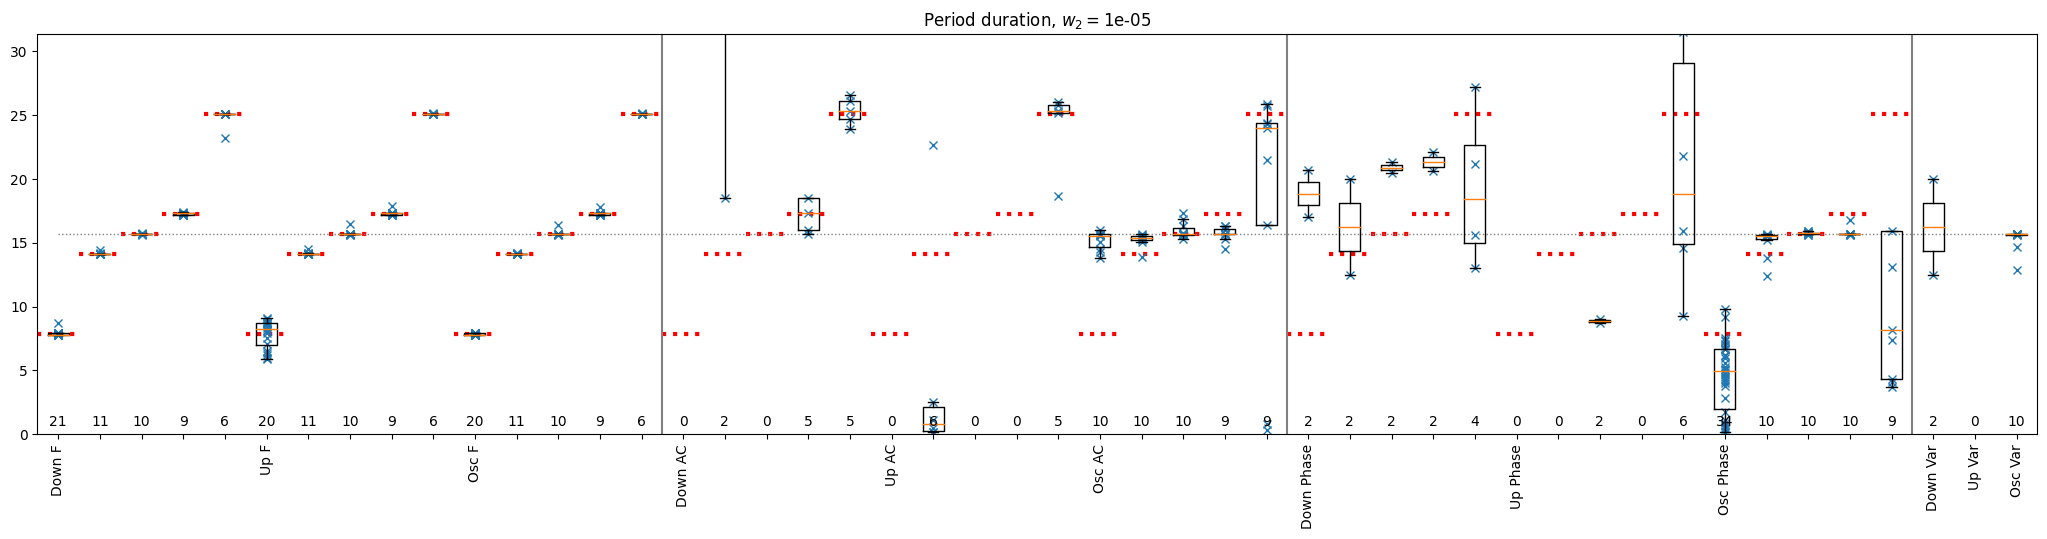

In [23]:
for iw in range(len(w2_array)):
    ydata = []
    xlabels = []
    fig = plt.figure(figsize =(20, 4))
    ax = fig.add_axes([0, 0, 1, 1])

    xpos = 0

    for imet in range(4):

        for pind in range(len(comp_points)):

            for itar in range(len(target_array)):

                if imet == 3:
                    if itar != 1:
                        continue

                target_period = target_array[itar]
                #xpos = 15*imet + 5*pind + itar

                if imet != 3:
                    if itar != 0:
                        xlabels.append("")
                    else:
                        xlabels.append(xl[imet][pind])
                if imet == 3:
                    xlabels.append(xl[imet][pind])

                data = results["periods"][pind][itar][imet][iw]
                ydata_ = []
                
                if data is None:
                    ydata.append(ydata_)
                    continue

                n_datapoints = 0

                for n in range(N):
                    n_datapoints += len(data[n])
                    
                    if len(data[n]) != 0:
                        for dpoint in data[n]:
                            ax.plot(xpos+1, dpoint, marker="x", color=colors[n])
                            ydata_.append(dpoint)

                ydata.append(ydata_)

                ax.text(xpos+1, 1, str(n_datapoints), horizontalalignment='center', verticalalignment='center')
                if imet != 3: ax.hlines(target_period, xpos+0.5, xpos+1.5, linestyle=":", color="red", linewidth =3)

                xpos += 1


    ax.boxplot(ydata, showfliers=False)
    ax.plot()
    ax.vlines([15.5, 30.5, 45.5], 0., 2.*period, color="grey")
    ax.hlines(period, 1., len(xlabels), linestyle=":", color="grey",linewidth = 1)
    ax.set_xticklabels(xlabels, rotation=90)
    ax.set_ylim(0., 2.*period)
    ax.set_title(r"Period duration, $w_2 = $" + "{}".format(w2_array[iw]))
    plt.show()
    fig.savefig(os.path.join(dir, "periods_" + str(iw) + ".png"), bbox_inches='tight')